Submitted by: Fawad Kirmani

Last Modified: 11/30/2021

GitHub Link: https://github.com/fkirmani/csce590-001/tree/main/Project

In [323]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

Load data

In [324]:
input_data = pd.read_csv('./data/pineallas_DataDownload_2425484_row_2015_2021.txt', delimiter="\t", 
                         low_memory=False)  
input_data.head()

,WBodyID,WaterBodyName,DataSource,StationID,StationName,Actual_StationID,Actual_Latitude,Actual_Longitude,DEP_WBID,SampleDate,ActivityDepth,DepthUnits,Parameter,Characteristic,Sample_Fraction,Result_Value,Result_Unit,QACode,Result_Comment,Original_Result_Value,Original_Result_Unit
0,890,Allen Creek,WIN_21FLPDEM,"=""19-08""",NaN,"=""19-08""",27.9407,-82.7596,1604B1,1/30/2018 9:35:00 AM,0.2,m,ChlaC_ugl,"Chlorophyll a, corrected for pheophytin",Total,4.3,ug/l,NaN,NaN,4.3,mg/m3
1,890,Allen Creek,WIN_21FLPDEM,"=""19-08""",NaN,"=""19-08""",27.9407,-82.7596,1604B1,1/30/2018 9:35:00 AM,0.2,m,chlb_ugl,Chlorophyll b,Total,0.5,ug/l,U,NaN,0.5,mg/m3
2,890,Allen Creek,WIN_21FLPDEM,"=""19-08""",NaN,"=""19-08""",27.9407,-82.7596,1604B1,1/30/2018 9:35:00 AM,0.2,m,chlc_ugl,Chlorophyll c,Total,0.5,ug/l,NaN,NaN,0.5,mg/m3
3,890,Allen Creek,WIN_21FLPDEM,"=""19-08""",NaN,"=""19-08""",27.9407,-82.7596,1604B1,1/30/2018 9:35:00 AM,0.2,m,Ecoli_100ml,Escherichia coli,Total,821.0,cfu/100ml,NaN,NaN,821,MPN/100 mL
4,890,Allen Creek,WIN_21FLPDEM,"=""19-08""",NaN,"=""19-08""",27.9407,-82.7596,1604B1,1/30/2018 9:35:00 AM,0.2,m,NH3_N_ugl,"Nitrogen, ammonia as N",Total,90.0,ug/l,NaN,NaN,0.09,mg/L


In [325]:
input_data_pivot = input_data.pivot_table(columns="Parameter", 
                       index=["SampleDate", "ActivityDepth", "WBodyID", "Result_Comment"], 
                       values="Result_Value").reset_index()
input_data_pivot

Parameter,SampleDate,ActivityDepth,WBodyID,Result_Comment,245T_ugl,24D_ugl,3Hydroxycarbofuran_ugl,Acifluorfen_ugl,Ag_ugl,Al_ugl,Alachlor_ugl,Aldicarb_ugl,...,Terbufos_ugl,Tl_ugl,Toxaphene_ugl,Turb_ntu,Zn_ugl,alphaBHC_ugl,betaBHC_ugl,chlb_ugl,chlc_ugl,diazinon_ugl,hardness_mglCaCO3,pH
0,1/1/2016 12:00:00 AM,0.500000,5074,Water Institute Calculated,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/1/2017 12:00:00 AM,0.500000,5074,Water Institute Calculated,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1/1/2018 12:00:00 AM,0.500000,5074,Water Institute Calculated,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1/10/2017 12:00:00 AM,0.457317,14143,**U**,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1/10/2019 11:10:00 AM,0.500000,20009,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25211,9/9/2019 9:57:00 AM,0.200000,7382,I - Final dried residue < 2.5 mg as req'd by m...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25212,9/9/2019 9:57:00 AM,0.200000,7382,Sample fraction omitted per WIN guidelines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25213,9/9/2019 9:57:00 AM,0.198000,7382,no visible particles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.93
25214,9/9/2019 9:58:00 AM,0.939000,7382,no visible particles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.83


In [326]:
input_data_pivot.rename(columns={'Sucralose_ug/l':'Sucralose_ugl'}, inplace=True)

In [327]:
# input_data_pivot_algal = input_data_pivot[input_data_pivot['Result_Comment'].str.contains('algal' or 'algae')]

In [328]:
# input_data_pivot_algal.shape

summarizing statistics of input_data_pivot dataframe

In [329]:
summary = input_data_pivot.describe()
print(summary.columns)
summary

Index(['ActivityDepth', 'WBodyID', '245T_ugl', '24D_ugl', '3Hydroxycarbofuran_ugl', 'Acifluorfen_ugl', 'Ag_ugl', 'Al_ugl', 'Alachlor_ugl', 'Aldicarb_ugl',
       ...
       'Toxaphene_ugl', 'Turb_ntu', 'Zn_ugl', 'alphaBHC_ugl', 'betaBHC_ugl', 'chlb_ugl', 'chlc_ugl', 'diazinon_ugl', 'hardness_mglCaCO3', 'pH'], dtype='object', name='Parameter', length=146)


Parameter,ActivityDepth,WBodyID,245T_ugl,24D_ugl,3Hydroxycarbofuran_ugl,Acifluorfen_ugl,Ag_ugl,Al_ugl,Alachlor_ugl,Aldicarb_ugl,Aldicarbsulfone_ugl,Aldicarbsulfoxide_ugl,...,Terbufos_ugl,Tl_ugl,Toxaphene_ugl,Turb_ntu,Zn_ugl,alphaBHC_ugl,betaBHC_ugl,chlb_ugl,chlc_ugl,diazinon_ugl,hardness_mglCaCO3,pH
count,25216.000000,2.521600e+04,1.000,127.000000,1.000,1.000,8.000000,116.000000,30.000000,1.00,1.000,1.000,...,29.000000,3.000000e+00,3.000000,3481.000000,26.000000,24.000000,24.000000,2471.000000,2476.000000,29.000000,1.0,10685.000000
mean,0.670188,1.768264e+04,0.002,0.167666,0.002,0.002,0.025000,52.250000,0.012234,0.02,0.002,0.002,...,0.000098,4.000000e-01,0.031667,3.511514,9.153846,0.002063,0.005188,0.722278,1.311167,0.000144,78.8,7.892637
std,0.908931,1.508662e+05,NaN,0.741075,NaN,NaN,0.016036,68.576653,0.065683,NaN,NaN,NaN,...,0.000005,6.798700e-17,0.001155,28.964917,5.091108,0.000065,0.002426,1.648807,1.828484,0.000107,NaN,0.484363
min,-0.018862,1.500000e+01,0.002,0.002000,0.002,0.002,0.010000,6.300000,0.000230,0.02,0.002,0.002,...,0.000090,4.000000e-01,0.031000,0.100000,3.500000,0.001900,0.001900,0.200000,0.400000,0.000120,78.8,2.250000
25%,0.200000,9.620000e+02,0.002,0.005500,0.002,0.002,0.010000,20.000000,0.000240,0.02,0.002,0.002,...,0.000090,4.000000e-01,0.031000,1.300000,5.000000,0.002000,0.004100,0.500000,0.500000,0.000120,78.8,7.630000
50%,0.260000,2.000000e+04,0.002,0.018000,0.002,0.002,0.025000,29.000000,0.000240,0.02,0.002,0.002,...,0.000100,4.000000e-01,0.031000,2.000000,5.850000,0.002100,0.004100,0.500000,0.800000,0.000120,78.8,8.010000
75%,0.764000,2.000900e+04,0.002,0.073000,0.002,0.002,0.040000,56.000000,0.000247,0.02,0.002,0.002,...,0.000100,4.000000e-01,0.032000,3.400000,15.000000,0.002100,0.004225,0.500000,1.500000,0.000120,78.8,8.170000
max,9.300000,4.000041e+06,0.002,6.700000,0.002,0.002,0.040000,534.000000,0.360000,0.02,0.002,0.002,...,0.000110,4.000000e-01,0.033000,1700.000000,20.000000,0.002200,0.011000,52.200000,49.300000,0.000690,78.8,12.970000


Not every parameter is measured on every date the survey of water is conducted.

In [330]:
input_data_algal_no_null_columns = input_data_pivot.dropna(axis=1, how='all')
input_data_algal_no_null_columns

Parameter,SampleDate,ActivityDepth,WBodyID,Result_Comment,245T_ugl,24D_ugl,3Hydroxycarbofuran_ugl,Acifluorfen_ugl,Ag_ugl,Al_ugl,Alachlor_ugl,Aldicarb_ugl,...,Terbufos_ugl,Tl_ugl,Toxaphene_ugl,Turb_ntu,Zn_ugl,alphaBHC_ugl,betaBHC_ugl,chlb_ugl,chlc_ugl,diazinon_ugl,hardness_mglCaCO3,pH
0,1/1/2016 12:00:00 AM,0.500000,5074,Water Institute Calculated,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/1/2017 12:00:00 AM,0.500000,5074,Water Institute Calculated,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1/1/2018 12:00:00 AM,0.500000,5074,Water Institute Calculated,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1/10/2017 12:00:00 AM,0.457317,14143,**U**,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1/10/2019 11:10:00 AM,0.500000,20009,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25211,9/9/2019 9:57:00 AM,0.200000,7382,I - Final dried residue < 2.5 mg as req'd by m...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25212,9/9/2019 9:57:00 AM,0.200000,7382,Sample fraction omitted per WIN guidelines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25213,9/9/2019 9:57:00 AM,0.198000,7382,no visible particles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.93
25214,9/9/2019 9:58:00 AM,0.939000,7382,no visible particles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.83


#### creating labels for algal bloom

In [331]:
search = ['algal', 'algae']

In [332]:
input_data_pivot.loc[~input_data_pivot['Result_Comment'].str.contains('&'.join(search)),'label1'] = 0

input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains("no evidence of algal bloom"),'label1'] = 0
input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains("no visible algal bloom"),'label1'] = 0
# input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains("no visible particle film"),'label1'] = 0
# input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains("green color, slight film on filter"),'label1'] = 0
# input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains("slight film on filter"),'label1'] = 0
# input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains(", clean filter"),'label1'] = 0
# input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains("normal distribution potential outlier"),'label1'] = 0
input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains("suspected algal bloom"),'label1'] = 1
input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains("suspect pyrodinium algal bloom"),'label1'] = 1
input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains("suspect algal bloom"),'label1'] = 1
input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains("algal bloom evidence"),'label1'] = 2
input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains("evidence of algal bloom"),'label1'] = 2
input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains(", algal bloom"),'label1'] = 2
input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains("dense algae"),'label1'] = 3
input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains("dense algal growth"),'label1'] = 3
input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains("suspect increased algal productivity"),'label1'] = 3
input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains("algae detritus"),'label1'] = 3
input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains("heavy algal epiphytes"),'label1'] = 3
input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains("algal epiphytes"),'label1'] = 3
input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains("decayed algal debris"),'label1'] = 3
input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains("brown green algal colonies"),'label1'] = 3
input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains("algal debris"),'label1'] = 3
input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains("red tide algal bloom"),'label1'] = 3
input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains("thick algal growth altering flow"),'label1'] = 3
input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains("stagnant turbid algal growth"),'label1'] = 3
input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains("algal gr"),'label1'] = 3
input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains("green algal mats"),'label1'] = 3
input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains("thic algal lining"),'label1'] = 3
input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains("algal colonies"),'label1'] = 3
input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains("dense living and decaying algae"),'label1'] = 3
input_data_pivot.loc[input_data_pivot['Result_Comment'].str.contains("algae and floating vegetation"),'label1'] = 3

In [333]:
input_data_pivot[['Result_Comment', 'label1']].loc[1111]

Parameter
Result_Comment    D
label1            0
Name: 1111, dtype: object

In [334]:
input_data_pivot[input_data_pivot['label1'].isnull()]

Parameter,SampleDate,ActivityDepth,WBodyID,Result_Comment,245T_ugl,24D_ugl,3Hydroxycarbofuran_ugl,Acifluorfen_ugl,Ag_ugl,Al_ugl,Alachlor_ugl,Aldicarb_ugl,...,Tl_ugl,Toxaphene_ugl,Turb_ntu,Zn_ugl,alphaBHC_ugl,betaBHC_ugl,chlb_ugl,chlc_ugl,diazinon_ugl,hardness_mglCaCO3,pH,label1


In [335]:
len(input_data_pivot['Result_Comment'].unique())

5312

Percentage of missing values in each parameter

In [336]:
for i in range(len(input_data_pivot.columns)):
    missing_data = input_data_pivot[input_data_pivot.columns[i]].isna().sum()
    perc = missing_data / len(input_data_pivot) * 100
    print('>%d,  missing entries: %d, percentage %.2f' % (i, missing_data, perc))

>0,  missing entries: 0, percentage 0.00
>1,  missing entries: 0, percentage 0.00
>2,  missing entries: 0, percentage 0.00
>3,  missing entries: 0, percentage 0.00
>4,  missing entries: 25215, percentage 100.00
>5,  missing entries: 25089, percentage 99.50
>6,  missing entries: 25215, percentage 100.00
>7,  missing entries: 25215, percentage 100.00
>8,  missing entries: 25208, percentage 99.97
>9,  missing entries: 25100, percentage 99.54
>10,  missing entries: 25186, percentage 99.88
>11,  missing entries: 25215, percentage 100.00
>12,  missing entries: 25215, percentage 100.00
>13,  missing entries: 25215, percentage 100.00
>14,  missing entries: 25192, percentage 99.90
>15,  missing entries: 25011, percentage 99.19
>16,  missing entries: 25183, percentage 99.87
>17,  missing entries: 25211, percentage 99.98
>18,  missing entries: 25207, percentage 99.96
>19,  missing entries: 25176, percentage 99.84
>20,  missing entries: 25187, percentage 99.88
>21,  missing entries: 24456, percent

Heatmap of missing values in each parameter/column

<AxesSubplot:xlabel='Parameter'>

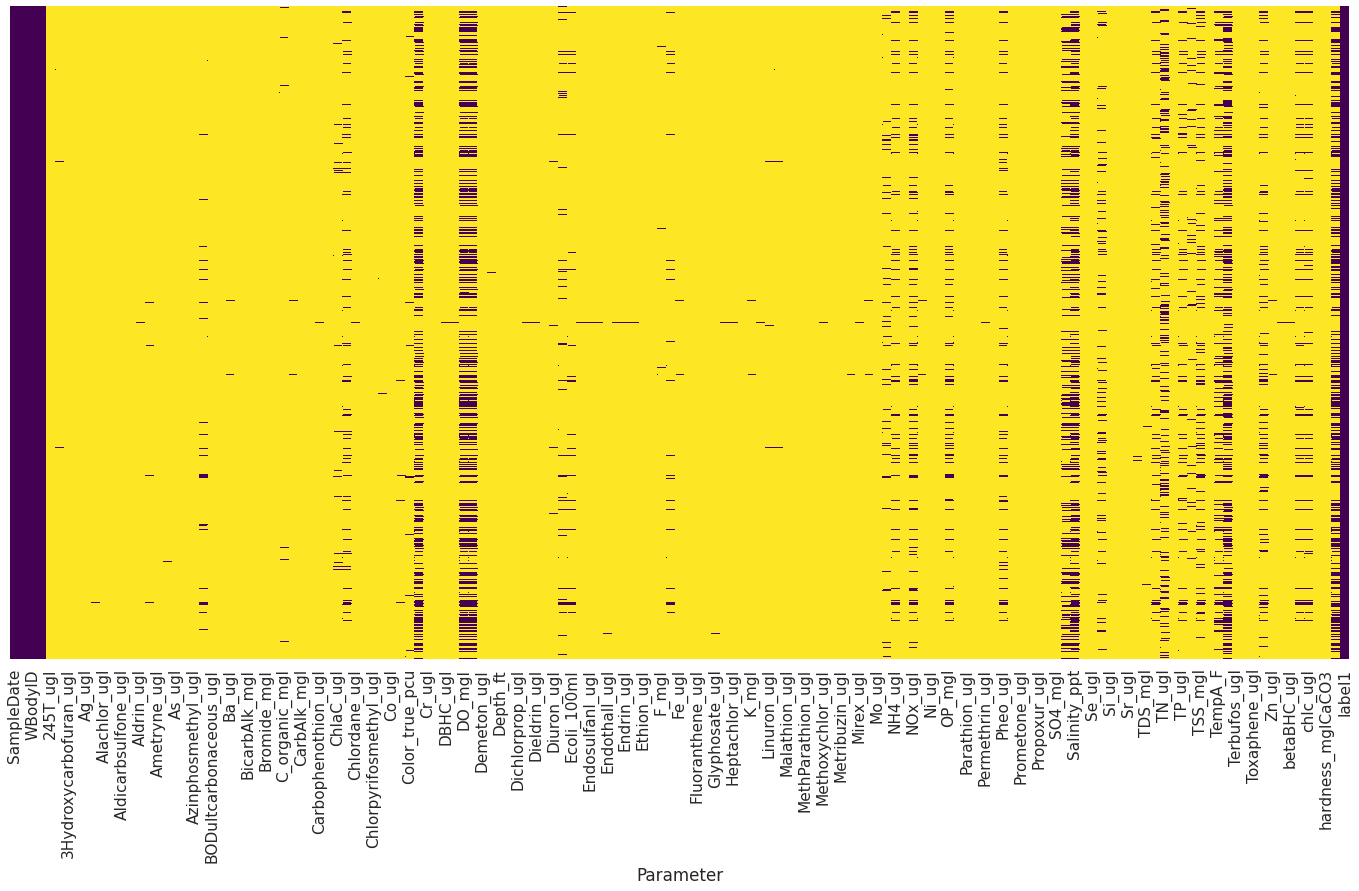

In [337]:
plt.rcParams["figure.figsize"] = [24, 12]
sns.heatmap(input_data_pivot.isna(), cbar=False, cmap='viridis', yticklabels=False)

From above figure, we can observe there are lot of missing data in every column except "SampleDate" and "ActivityDepth" which have no missing value.

##### Correlation Heatmap with label 1

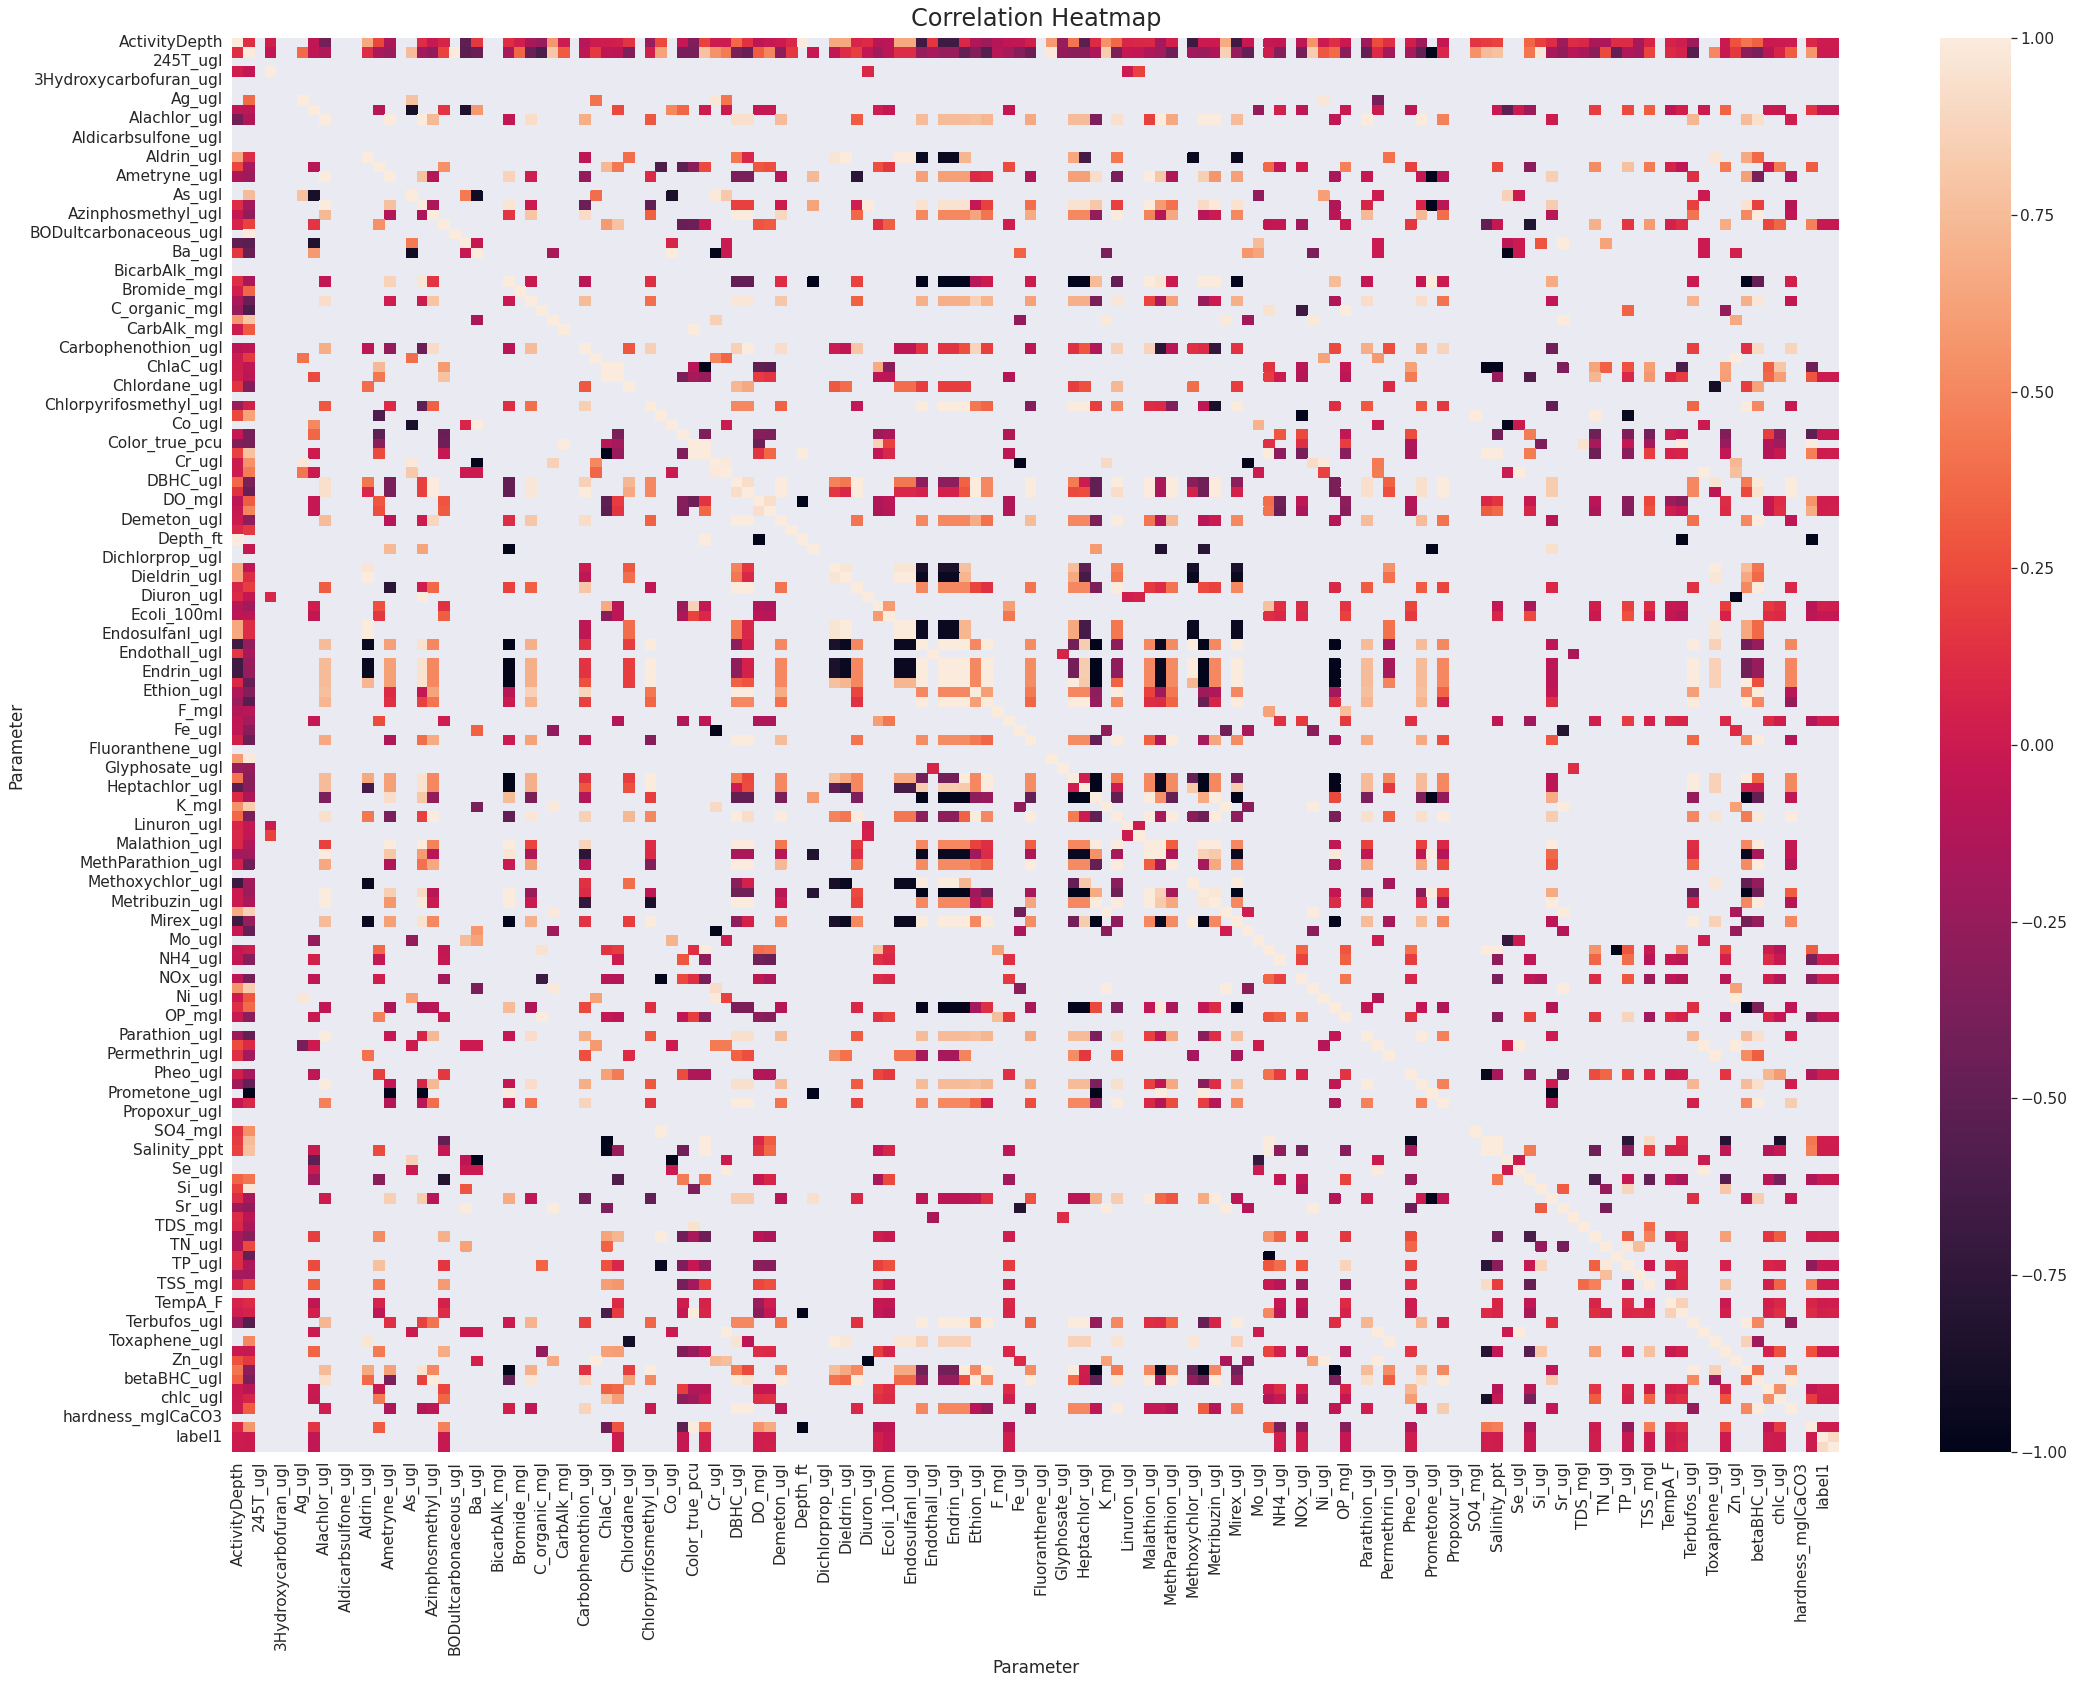

In [627]:
corr1 = input_data_pivot.corr()
# mask = np.triu(np.ones_like(input_data_pivot.corr(), dtype=bool))

# plotting the heatmap
plt.rcParams["figure.figsize"] = [36, 26]
heatmap = sns.heatmap(corr1)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':24}, pad=12);
heatmap.figure.savefig('./figs/heatmap_label1', dpi=300)

Top Correlated Features

In [ ]:
corr1.reset_index()
for i, col in enumerate(corr1.columns):
    try:
        top = pd.DataFrame(corr1[(corr1[col]>0.9) | (corr1[col]<-0.9)][col].nlargest(8).to_frame()).reset_index()
        top = top.drop(top[top["Parameter"]==col].index)
        if top.empty:
            pass
        else: 
            print(top)
            print("\n")
    except:
        pass

  Parameter  ActivityDepth
1  Depth_ft            1.0


                Parameter   WBodyID
1  BODultcarbonaceous_ugl  1.000000
2                 Gage_ft  0.987103
3                  Si_ugl  0.972830
4           Prometone_ugl -1.000000


  Parameter    Ag_ugl
1    Cr_ugl  0.969717
2    Ni_ugl  0.969714


         Parameter  Alachlor_ugl
1    Parathion_ugl      1.000000
2      Phorate_ugl      1.000000
3  Metolachlor_ugl      0.999954
4    Metalaxyl_ugl      0.999951
5     Ametryne_ugl      0.999945
6   Metribuzin_ugl      0.999851
7     Atrazine_ugl      0.998943


            Parameter  Aldrin_ugl
1        Dieldrin_ugl    1.000000
2    EndosulfanII_ugl    1.000000
3     EndosulfanI_ugl    1.000000
4       Toxaphene_ugl    0.970725
5         Dicofol_ugl    0.965337
6   EndosulfanSO4_ugl   -0.940712
7  EndrinAldehyde_ugl   -0.940712


        Parameter  Ametryne_ugl
1    Alachlor_ugl      0.999945
2   Malathion_ugl      0.999695
3  Hexazinone_ugl      0.924660
4   Prometone_ugl     -1.0

Three highly correlated feature pairs are:

    1. Ecoli_100ml and Al_ugl
    2. Zn_ugl and Si_ugl
    3. DO_percent and Fe_diss_ugl

In [340]:
import math as mt

import xgboost as xgb
from matplotlib import pyplot
from numpy import sort
from scipy import interp
from itertools import cycle
from sklearn.feature_selection import SelectFromModel, f_classif
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import train_test_split
import seaborn as sn

In [341]:
input_data_pivot['label2'] = np.where(input_data_pivot['label1']==0, 0, 1)
input_data_algal_label2 = input_data_pivot.drop(columns=['label1'])
input_data_algal_label2.shape

(25216, 149)

##### Correlation Heatmap with label 2

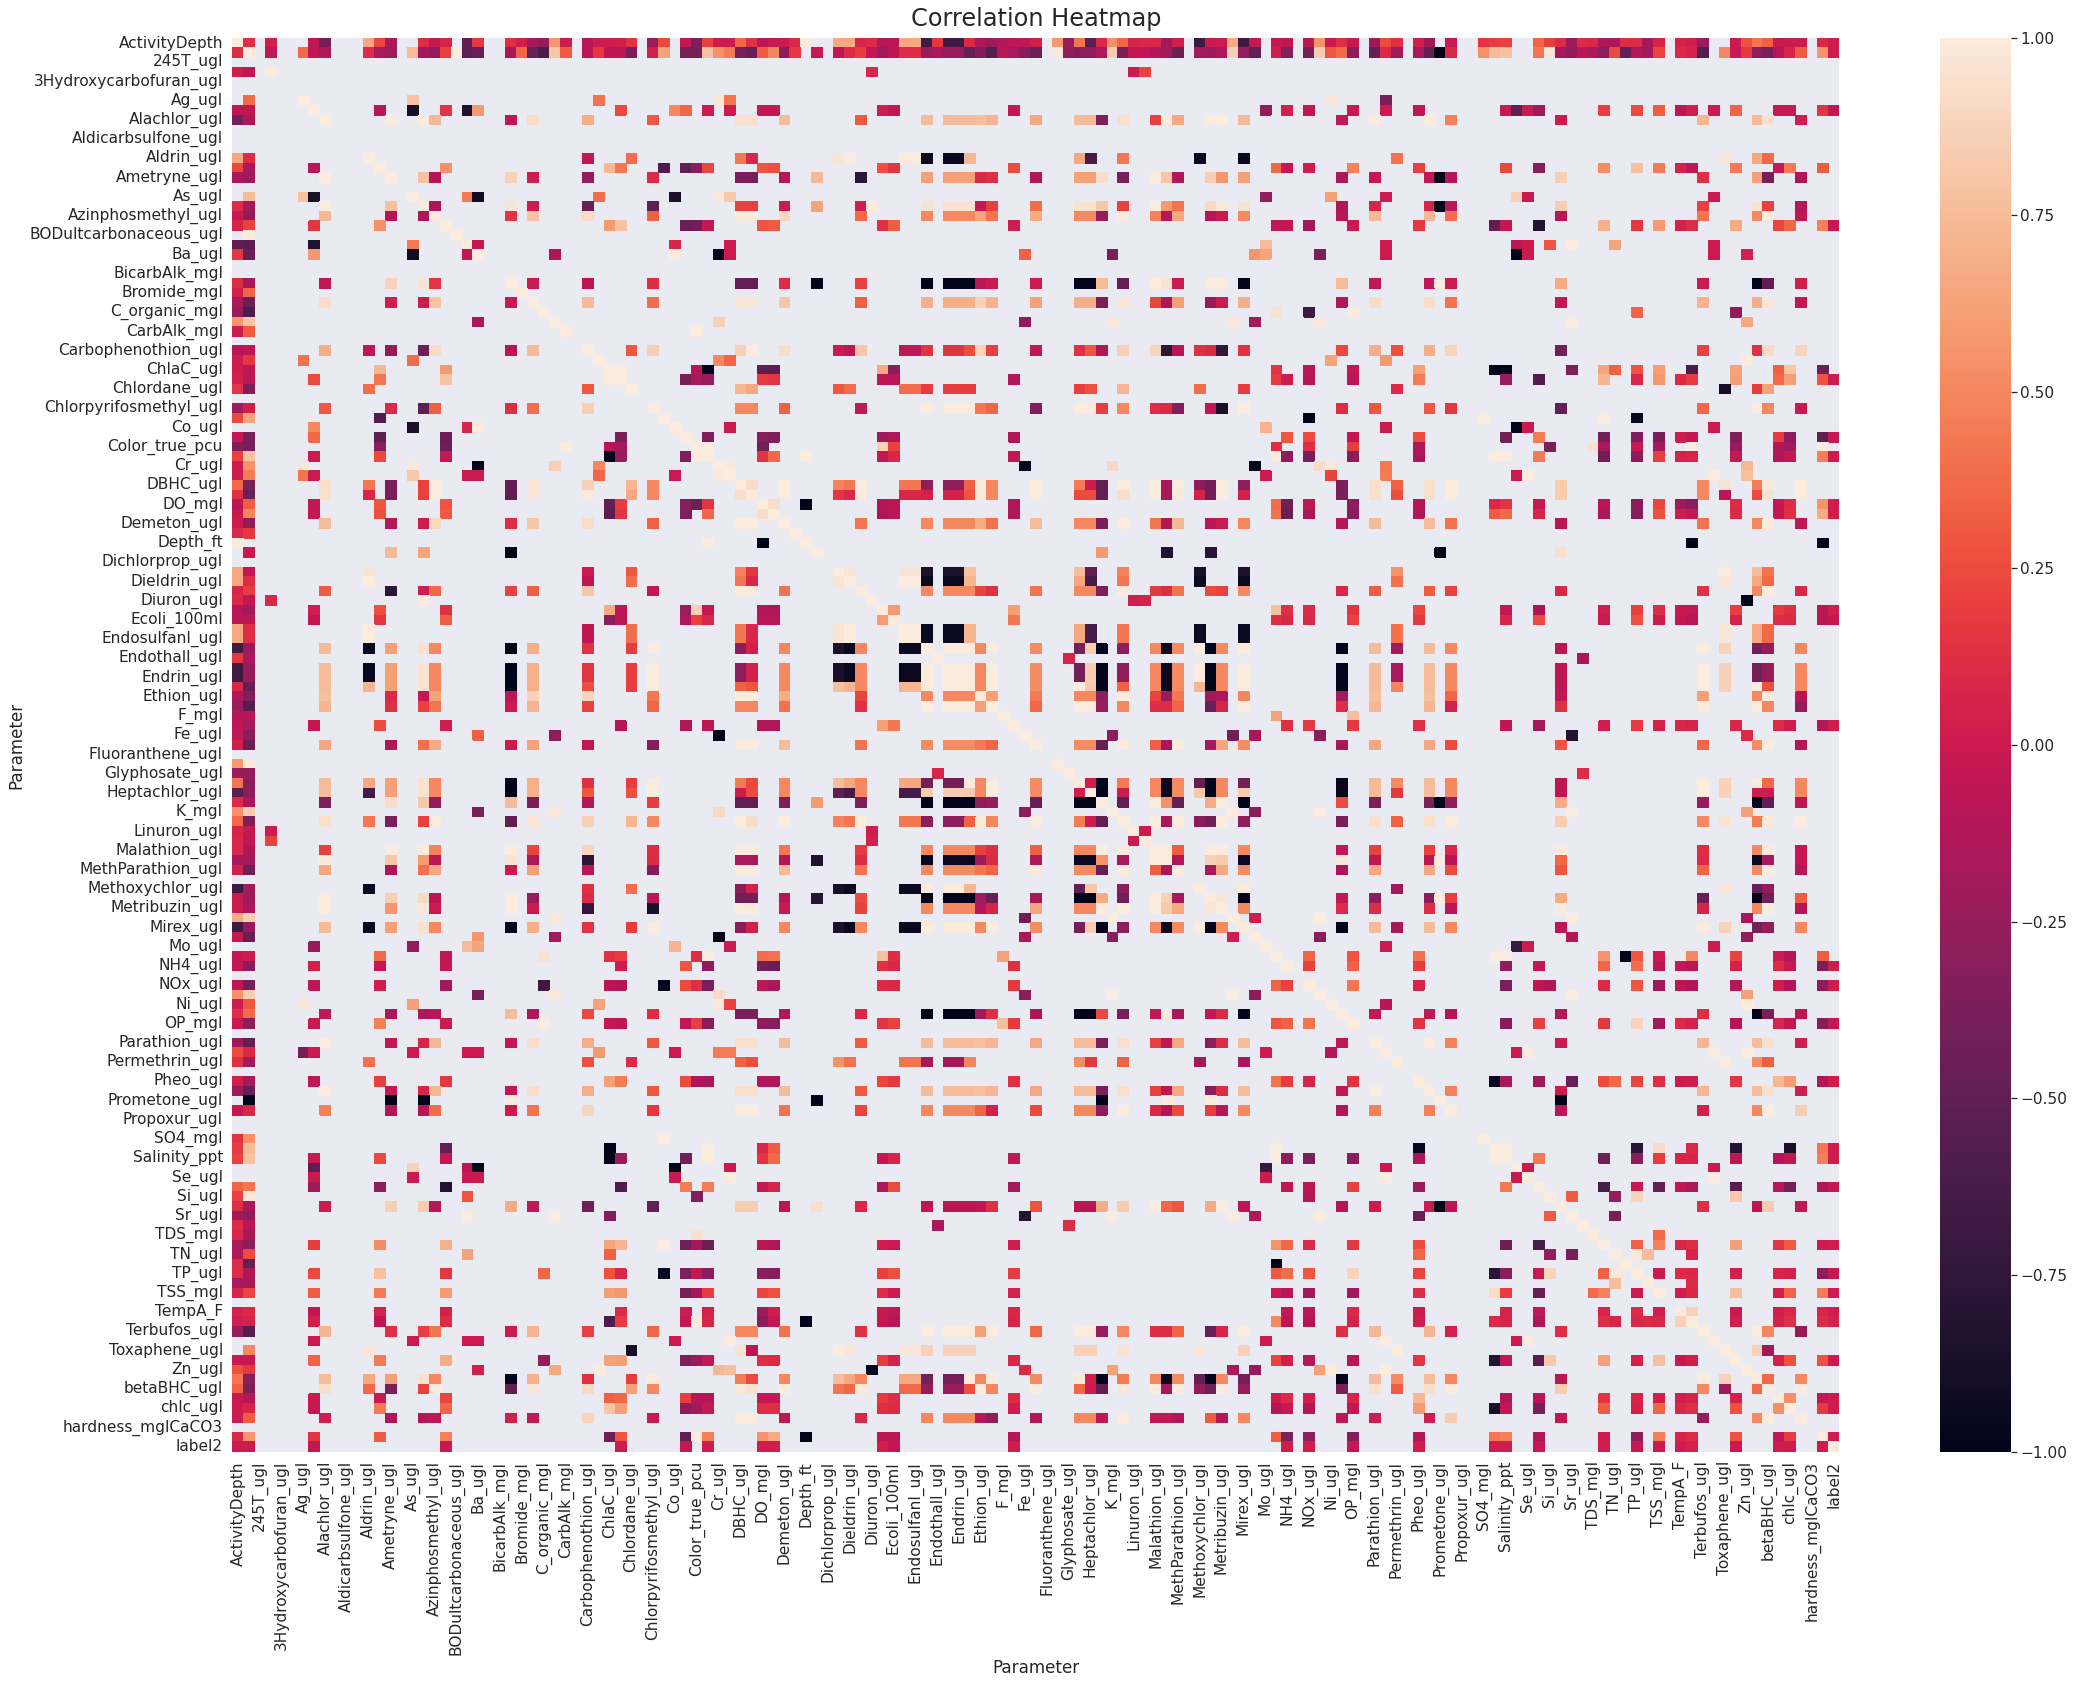

In [628]:
corr2 = input_data_algal_label2.corr()
# mask = np.triu(np.ones_like(input_data_pivot.corr(), dtype=bool))

# plotting the heatmap
plt.rcParams["figure.figsize"] = [36, 26]
heatmap = sns.heatmap(corr2)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':24}, pad=12);
heatmap.figure.savefig('./figs/heatmap_label2', dpi=300)

In [343]:
corr2.reset_index()
for i, col in enumerate(corr2.columns):
    try:
        top = pd.DataFrame(corr2[(corr2[col]>0.9) | (corr2[col]<-0.9)][col].nlargest(8).to_frame()).reset_index()
        top = top.drop(top[top["Parameter"]==col].index)
        if top.empty:
            pass
        else: 
            print(top)
            print("\n")
    except:
        pass

  Parameter  ActivityDepth
1  Depth_ft            1.0


                Parameter   WBodyID
1  BODultcarbonaceous_ugl  1.000000
2                 Gage_ft  0.987103
3                  Si_ugl  0.972830
4           Prometone_ugl -1.000000


  Parameter    Ag_ugl
1    Cr_ugl  0.969717
2    Ni_ugl  0.969714


         Parameter  Alachlor_ugl
1    Parathion_ugl      1.000000
2      Phorate_ugl      1.000000
3  Metolachlor_ugl      0.999954
4    Metalaxyl_ugl      0.999951
5     Ametryne_ugl      0.999945
6   Metribuzin_ugl      0.999851
7     Atrazine_ugl      0.998943


            Parameter  Aldrin_ugl
1        Dieldrin_ugl    1.000000
2    EndosulfanII_ugl    1.000000
3     EndosulfanI_ugl    1.000000
4       Toxaphene_ugl    0.970725
5         Dicofol_ugl    0.965337
6   EndosulfanSO4_ugl   -0.940712
7  EndrinAldehyde_ugl   -0.940712


        Parameter  Ametryne_ugl
1    Alachlor_ugl      0.999945
2   Malathion_ugl      0.999695
3  Hexazinone_ugl      0.924660
4   Prometone_ugl     -1.0

In [374]:
input_data_algal_imputed = input_data_algal_label2.drop(columns=['Result_Comment', 'SampleDate', 'WBodyID']) #, 'Al_ugl', 'BOD5_mgl', 'Color_apparent_pcu'

# Imputing missing values
imputer = SimpleImputer(missing_values=np.NaN, strategy='mean')
for i in range(len(input_data_algal_imputed.columns)):
    input_data_algal_imputed[input_data_algal_imputed.columns[i]] = imputer.fit_transform(input_data_algal_imputed[input_data_algal_imputed.columns[i]].values.reshape(-1,1))[:,0]

input_data_algal_imputed

Parameter,ActivityDepth,245T_ugl,24D_ugl,3Hydroxycarbofuran_ugl,Acifluorfen_ugl,Ag_ugl,Al_ugl,Alachlor_ugl,Aldicarb_ugl,Aldicarbsulfone_ugl,Aldicarbsulfoxide_ugl,Aldrin_ugl,...,Tl_ugl,Toxaphene_ugl,Turb_ntu,Zn_ugl,alphaBHC_ugl,betaBHC_ugl,chlb_ugl,chlc_ugl,diazinon_ugl,hardness_mglCaCO3,pH,label2
0,0.500000,0.002,0.167666,0.002,0.002,0.025,52.25,0.012234,0.02,0.002,0.002,0.004058,...,0.4,0.031667,3.511514,9.153846,0.002063,0.005188,0.722278,1.311167,0.000144,78.8,7.892637,0.0
1,0.500000,0.002,0.167666,0.002,0.002,0.025,52.25,0.012234,0.02,0.002,0.002,0.004058,...,0.4,0.031667,3.511514,9.153846,0.002063,0.005188,0.722278,1.311167,0.000144,78.8,7.892637,0.0
2,0.500000,0.002,0.167666,0.002,0.002,0.025,52.25,0.012234,0.02,0.002,0.002,0.004058,...,0.4,0.031667,3.511514,9.153846,0.002063,0.005188,0.722278,1.311167,0.000144,78.8,7.892637,0.0
3,0.457317,0.002,0.167666,0.002,0.002,0.025,52.25,0.012234,0.02,0.002,0.002,0.004058,...,0.4,0.031667,3.511514,9.153846,0.002063,0.005188,0.722278,1.311167,0.000144,78.8,7.892637,0.0
4,0.500000,0.002,0.167666,0.002,0.002,0.025,52.25,0.012234,0.02,0.002,0.002,0.004058,...,0.4,0.031667,3.511514,9.153846,0.002063,0.005188,0.722278,1.311167,0.000144,78.8,7.892637,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25211,0.200000,0.002,0.167666,0.002,0.002,0.025,52.25,0.012234,0.02,0.002,0.002,0.004058,...,0.4,0.031667,3.511514,9.153846,0.002063,0.005188,0.722278,1.311167,0.000144,78.8,7.892637,0.0
25212,0.200000,0.002,0.167666,0.002,0.002,0.025,52.25,0.012234,0.02,0.002,0.002,0.004058,...,0.4,0.031667,1.800000,9.153846,0.002063,0.005188,0.722278,1.311167,0.000144,78.8,7.892637,0.0
25213,0.198000,0.002,0.167666,0.002,0.002,0.025,52.25,0.012234,0.02,0.002,0.002,0.004058,...,0.4,0.031667,3.511514,9.153846,0.002063,0.005188,0.722278,1.311167,0.000144,78.8,7.930000,0.0
25214,0.939000,0.002,0.167666,0.002,0.002,0.025,52.25,0.012234,0.02,0.002,0.002,0.004058,...,0.4,0.031667,3.511514,9.153846,0.002063,0.005188,0.722278,1.311167,0.000144,78.8,7.830000,0.0


In [375]:
summary = input_data_algal_imputed.describe()
print(summary.columns)
summary

Index(['ActivityDepth', '245T_ugl', '24D_ugl', '3Hydroxycarbofuran_ugl', 'Acifluorfen_ugl', 'Ag_ugl', 'Al_ugl', 'Alachlor_ugl', 'Aldicarb_ugl', 'Aldicarbsulfone_ugl',
       ...
       'Turb_ntu', 'Zn_ugl', 'alphaBHC_ugl', 'betaBHC_ugl', 'chlb_ugl', 'chlc_ugl', 'diazinon_ugl', 'hardness_mglCaCO3', 'pH', 'label2'], dtype='object', name='Parameter', length=146)


Parameter,ActivityDepth,245T_ugl,24D_ugl,3Hydroxycarbofuran_ugl,Acifluorfen_ugl,Ag_ugl,Al_ugl,Alachlor_ugl,Aldicarb_ugl,Aldicarbsulfone_ugl,Aldicarbsulfoxide_ugl,Aldrin_ugl,...,Tl_ugl,Toxaphene_ugl,Turb_ntu,Zn_ugl,alphaBHC_ugl,betaBHC_ugl,chlb_ugl,chlc_ugl,diazinon_ugl,hardness_mglCaCO3,pH,label2
count,25216.000000,2.521600e+04,25216.000000,2.521600e+04,2.521600e+04,25216.000000,25216.000000,25216.000000,25216.00,2.521600e+04,2.521600e+04,25216.000000,...,2.521600e+04,25216.000000,25216.000000,25216.000000,25216.000000,25216.000000,25216.000000,25216.000000,25216.000000,2.521600e+04,25216.000000,25216.000000
mean,0.670188,2.000000e-03,0.167666,2.000000e-03,2.000000e-03,0.025000,52.250000,0.012234,0.02,2.000000e-03,2.000000e-03,0.004058,...,4.000000e-01,0.031667,3.511514,9.153846,0.002063,0.005187,0.722278,1.311167,0.000144,7.880000e+01,7.892637,0.006861
std,0.908931,8.673789e-19,0.052386,8.673789e-19,8.673789e-19,0.000267,4.631223,0.002228,0.00,8.673789e-19,8.673789e-19,0.000014,...,5.552216e-17,0.000010,10.760499,0.160307,0.000002,0.000073,0.516047,0.572861,0.000004,1.421114e-14,0.315288,0.082546
min,-0.018862,2.000000e-03,0.002000,2.000000e-03,2.000000e-03,0.010000,6.300000,0.000230,0.02,2.000000e-03,2.000000e-03,0.001900,...,4.000000e-01,0.031000,0.100000,3.500000,0.001900,0.001900,0.200000,0.400000,0.000120,7.880000e+01,2.250000,0.000000
25%,0.200000,2.000000e-03,0.167666,2.000000e-03,2.000000e-03,0.025000,52.250000,0.012234,0.02,2.000000e-03,2.000000e-03,0.004058,...,4.000000e-01,0.031667,3.511514,9.153846,0.002063,0.005188,0.722278,1.311167,0.000144,7.880000e+01,7.892637,0.000000
50%,0.260000,2.000000e-03,0.167666,2.000000e-03,2.000000e-03,0.025000,52.250000,0.012234,0.02,2.000000e-03,2.000000e-03,0.004058,...,4.000000e-01,0.031667,3.511514,9.153846,0.002063,0.005188,0.722278,1.311167,0.000144,7.880000e+01,7.892637,0.000000
75%,0.764000,2.000000e-03,0.167666,2.000000e-03,2.000000e-03,0.025000,52.250000,0.012234,0.02,2.000000e-03,2.000000e-03,0.004058,...,4.000000e-01,0.031667,3.511514,9.153846,0.002063,0.005188,0.722278,1.311167,0.000144,7.880000e+01,7.910000,0.000000
max,9.300000,2.000000e-03,6.700000,2.000000e-03,2.000000e-03,0.040000,534.000000,0.360000,0.02,2.000000e-03,2.000000e-03,0.004500,...,4.000000e-01,0.033000,1700.000000,20.000000,0.002200,0.011000,52.200000,49.300000,0.000690,7.880000e+01,12.970000,1.000000


In [376]:
X_train, X_test, y_train, y_test = train_test_split(input_data_algal_imputed.iloc[:,0:145], input_data_algal_imputed.iloc[:,145], 
                                                    random_state=42, test_size=0.8)

In [377]:
X_train = X_train.astype('float')
y_train = y_train.astype('int')
X_test = X_test.astype('float')
y_test = y_test.astype('int')

In [378]:
df_train_balanced_One = input_data_algal_imputed.loc[input_data_algal_imputed['label2'] == 1]
print(len(df_train_balanced_One))
df_train_balanced_Zero = input_data_algal_imputed.loc[input_data_algal_imputed['label2'] == 0]
print(len(df_train_balanced_Zero))

173
25043


### XGBoost Classifier

In [630]:
X_test.shape

(20173, 145)

In [379]:
max_depth = [2, 3, 5]
learning_rate = [0.01]
n_estimators = [100, 200, 300]
# use_label_encoder = [False]
eval_metric = ['error']
random_state = [80]
n_jobs = [-1]
gamma = [1, 1e1, 1e2, 1e3]
scale_pos_weight = [len(df_train_balanced_Zero.index) / len(df_train_balanced_One.index)]
# param_grid = dict(max_depth=max_depth, learning_rate=learning_rate, n_estimators=n_estimators,
#                   objective=objective, booster=booster, n_jobs=n_jobs, nthread=nthread, gamma=gamma,
#                   min_child_weight=min_child_weight, max_delta_step=max_delta_step, subsample=subsample,
#                   colsample_bytree=colsample_bytree, colsample_bylevel=colsample_bylevel, reg_alpha=reg_alpha,
#                   reg_lambda=reg_lambda, base_score=base_score, use_label_encoder = use_label_encoder,
#                   random_state=random_state)
xgb_param_grid = dict(max_depth=max_depth, learning_rate=learning_rate, n_estimators=n_estimators, random_state=random_state,
                      gamma=gamma, eval_metric=eval_metric, scale_pos_weight=scale_pos_weight,
                  n_jobs=n_jobs)

In [380]:
from sklearn.metrics import make_scorer
auc_predict_score = make_scorer(roc_auc_score)

In [381]:
# # train model
model1 = XGBClassifier()
CV_xgb = GridSearchCV(estimator=model1, param_grid=xgb_param_grid, scoring=auc_predict_score, cv=3, return_train_score=False)
CV_xgb.fit(X_train, y_train)
CV_xgb.cv_results_

{'mean_fit_time': array([0.69411127, 1.31389681, 1.95990284, 0.92922616, 1.83721534,
        2.75323232, 2.45454057, 5.01289797, 6.71845595, 0.77935656,
        2.16218479, 2.98428742, 1.20675429, 2.5187699 , 4.87571446,
        1.71373153, 3.40874569, 6.96565191, 0.78909286, 1.83412218,
        2.70971711, 1.21839809, 2.49671157, 3.86086877, 1.4852651 ,
        2.88035798, 4.31605816, 0.66702938, 1.31445789, 1.96196818,
        0.92935729, 1.83700903, 2.74376869, 1.4063011 , 2.78914499,
        4.16262229]),
 'std_fit_time': array([3.80199240e-02, 3.46834838e-03, 2.58847613e-03, 1.01146524e-03,
        1.56486056e-03, 7.90015284e-03, 1.12296857e-01, 7.17836843e-02,
        6.43473382e-01, 4.94193111e-03, 3.46911571e-01, 4.30552821e-01,
        9.82329196e-02, 3.65851243e-01, 7.15527850e-02, 2.30730365e-01,
        2.10263690e-01, 9.97268975e-01, 1.87574131e-02, 2.12839299e-02,
        8.27464347e-02, 9.04295347e-02, 1.85483754e-01, 2.56265816e-01,
        7.44808592e-02, 1.85148995e-0

In [382]:
print(CV_xgb.best_params_)

{'eval_metric': 'error', 'gamma': 100.0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'n_jobs': -1, 'random_state': 80, 'scale_pos_weight': 144.757225433526}


In [581]:
# # eval model
# y_pred1 = cross_val_predict(CV_xgb, X_test, y_test, cv=3, method='predict_proba')[:, 1]
y_pred1 = CV_xgb.predict_proba(X_test)[:, 1]
print('Overall AUC:', roc_auc_score(y_test, y_pred1))
accuracy = accuracy_score(y_test, y_pred1.round(), normalize=True)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

confusion_matrix = confusion_matrix(y_test, y_pred1.round())
print(confusion_matrix)
print(classification_report(y_test, y_pred1.round()))
specificity = confusion_matrix[0, 0] / (confusion_matrix[0, 0] + confusion_matrix[0, 1])
sensitivity = confusion_matrix[1, 1] / (confusion_matrix[1, 0] + confusion_matrix[1, 1])
print("n=%d, Accuracy: %.2f%%, specificity: %.2f%%, sensitivity: %.2f%%" % (
    X_train.shape[1], accuracy * 100.0, specificity * 100.0, sensitivity * 100.0))

Overall AUC: 0.8906736811463359
[[17912  2119]
 [   49    93]]
              precision    recall  f1-score   support

           0       1.00      0.89      0.94     20031
           1       0.04      0.65      0.08       142

    accuracy                           0.89     20173
   macro avg       0.52      0.77      0.51     20173
weighted avg       0.99      0.89      0.94     20173

n=145, Accuracy: 89.25%, specificity: 89.42%, sensitivity: 65.49%


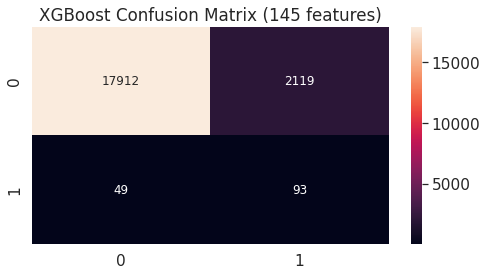

In [582]:
model_df_cm = pd.DataFrame(confusion_matrix, range(2), range(2)) 
plt.figure(figsize = (8, 4)) 
plt.title('XGBoost Confusion Matrix (145 features)')
sn.set(font_scale=1.4) #for label size 
sn.heatmap(model_df_cm, annot=True, annot_kws={"size": 12}, fmt="d").figure.savefig('./figs/xgboost_cm_145_features.png', dpi=300)
# plt.show()

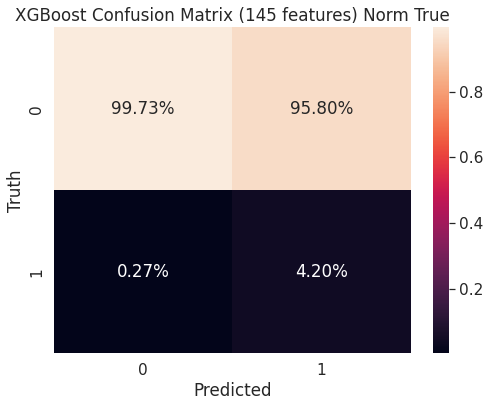

In [583]:
# from sklearn.metrics import plot_confusion_matrix
# plot_confusion_matrix(CV_xgb, X_test, y_test, values_format= '.0%', normalize='true'); 
# plt.title("normalize='true'");
model_df_cm = pd.DataFrame(confusion_matrix, range(2), range(2)) 
plt.figure(figsize = (8, 6)) 
plt.title('XGBoost Confusion Matrix (145 features) Norm True')
sn.set(font_scale=1.4) #for label size 
sn.heatmap(model_df_cm/model_df_cm.astype(np.float).sum(axis=0), annot=True, fmt='.2%')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.savefig('./figs/xgboost_cm_145_features_norm.png', dpi=300)
# plt.show()

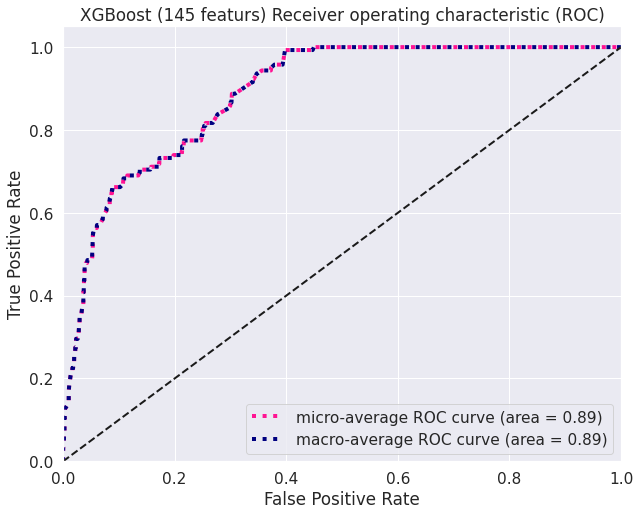

In [523]:
n_classes = 2

plt.figure(figsize = (10, 8)) 

# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred1)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred1.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
# plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes-97), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost (145 featurs) Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.savefig('./figs/XGBoost_ROC_145_features.png', dpi=300)
plt.show()

### Random Forest Classifier

In [545]:
n_estimators = [10, 25, 50]
max_depth = [2, 5, 10, 20]
max_features = ['auto', 'sqrt', 'log2']
max_leaf_nodes = [2, 3, 5]
n_jobs = [-1]
class_weight = ['balanced_subsample']
criterion = ['gini']
param_grid = dict(n_estimators=n_estimators, max_features=max_features, max_depth=max_depth, max_leaf_nodes=max_leaf_nodes,
                  n_jobs=n_jobs, criterion=criterion, class_weight=class_weight)

In [546]:
# # train model
model2 = RandomForestClassifier()
CV_rf = GridSearchCV(estimator=model2, param_grid=param_grid, scoring=auc_predict_score, cv=3, return_train_score=False)
CV_rf.fit(X_train, y_train)
CV_rf.cv_results_

{'mean_fit_time': array([0.16188796, 0.21404831, 0.31736199, 0.16146175, 0.22241362,
        0.31044793, 0.16214792, 0.22924304, 0.32384761, 0.16712832,
        0.19141571, 0.30509114, 0.16701563, 0.22278865, 0.31195672,
        0.16664743, 0.17962488, 0.30468734, 0.16483553, 0.21270251,
        0.27690872, 0.16619182, 0.21915038, 0.30334051, 0.16596142,
        0.18776774, 0.29593801, 0.15806691, 0.2167383 , 0.28128688,
        0.16787807, 0.21541119, 0.30501699, 0.16937542, 0.21359889,
        0.31174429, 0.16382027, 0.21791657, 0.30955664, 0.12897317,
        0.2148037 , 0.30887262, 0.1580143 , 0.218472  , 0.31948622,
        0.16174579, 0.22196039, 0.23695532, 0.159132  , 0.22229958,
        0.31174183, 0.13231293, 0.22000702, 0.30516887, 0.16473881,
        0.2216603 , 0.3075792 , 0.16254743, 0.22409161, 0.30914919,
        0.16164152, 0.22318983, 0.30925314, 0.13191024, 0.21764151,
        0.30506762, 0.16445812, 0.21576087, 0.31250048, 0.16254981,
        0.2156562 , 0.30733824,

In [575]:
print(CV_rf.best_params_)

{'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'max_leaf_nodes': 2, 'n_estimators': 25, 'n_jobs': -1}


In [586]:
# # eval model
# y_pred1 = cross_val_predict(CV_rf, X_test, y_test, cv=3, method='predict_proba')[:, 1]
y_pred1 = CV_rf.predict_proba(X_test)[:, 1]
print('Overall AUC:', roc_auc_score(y_test, y_pred1))
accuracy = accuracy_score(y_test, y_pred1.round(), normalize=True)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

confusion_matrix = confusion_matrix(y_test, y_pred1.round())
print(confusion_matrix)
print(classification_report(y_test, y_pred1.round()))
specificity = confusion_matrix[0, 0] / (confusion_matrix[0, 0] + confusion_matrix[0, 1])
sensitivity = confusion_matrix[1, 1] / (confusion_matrix[1, 0] + confusion_matrix[1, 1])
print("n=%d, Accuracy: %.2f%%, specificity: %.2f%%, sensitivity: %.2f%%" % (
    X_train.shape[1], accuracy * 100.0, specificity * 100.0, sensitivity * 100.0))

Overall AUC: 0.8549630115574381
[[14805  5226]
 [   22   120]]
              precision    recall  f1-score   support

           0       1.00      0.74      0.85     20031
           1       0.02      0.85      0.04       142

    accuracy                           0.74     20173
   macro avg       0.51      0.79      0.45     20173
weighted avg       0.99      0.74      0.84     20173

n=145, Accuracy: 73.99%, specificity: 73.91%, sensitivity: 84.51%


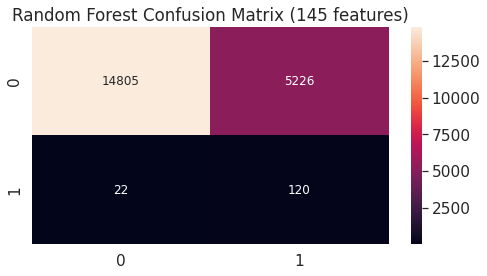

In [589]:
model_df_cm = pd.DataFrame(confusion_matrix, range(2), range(2)) 
plt.figure(figsize = (8, 4)) 
plt.title('Random Forest Confusion Matrix (145 features)')
sn.set(font_scale=1.4) #for label size 
sn.heatmap(model_df_cm, annot=True, annot_kws={"size": 12}, fmt="d").figure.savefig('./figs/random_forest_cm_145_features.png', dpi=300)
plt.show()

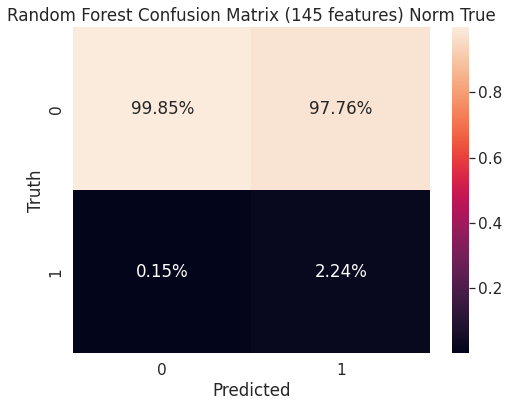

In [591]:
# from sklearn.metrics import plot_confusion_matrix
# plot_confusion_matrix(CV_xgb, X_test, y_test, values_format= '.0%', normalize='true'); 
# plt.title("normalize='true'");
model_df_cm = pd.DataFrame(confusion_matrix, range(2), range(2)) 
plt.figure(figsize = (8, 6)) 
plt.title('Random Forest Confusion Matrix (145 features) Norm True')
sn.set(font_scale=1.4) #for label size 
sn.heatmap(model_df_cm/model_df_cm.astype(np.float).sum(axis=0), annot=True, fmt='.2%')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.savefig('./figs/random_forest_cm_145_features_norm.png', dpi=300)
# plt.show()

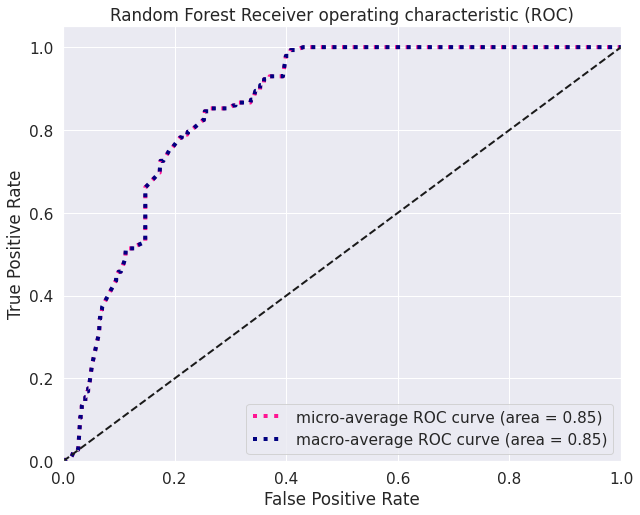

In [594]:
n_classes = 2

plt.figure(figsize = (10, 8)) 

# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred1)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred1.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
# plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes-97), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.savefig('./figs/random_forest_ROC_145_features.png', dpi=300)
# plt.show()

### Logistic Regression

In [608]:
C = [1e-3, 1e-2, 1e-1, 1e0, 1e1]
class_weight = ['balanced']
max_iter = [1e8]
# multi_class = ['multinomial']
param_grid = dict(C=C, class_weight=class_weight, max_iter=max_iter)

In [609]:
# # train model
model2 = LogisticRegression()
CV_lr = GridSearchCV(estimator=model2, param_grid=param_grid, scoring=auc_predict_score, cv=3, return_train_score=False)
CV_lr.fit(X_train, y_train)
CV_lr.cv_results_

{'mean_fit_time': array([2.75690643, 5.88421702, 8.3684996 , 8.49371274, 8.34634097]),
 'std_fit_time': array([0.11019528, 2.6723536 , 3.50958038, 3.32163165, 3.52738339]),
 'mean_score_time': array([0.00435241, 0.00397992, 0.00412544, 0.00439143, 0.00452177]),
 'std_score_time': array([0.00054784, 0.00016292, 0.00030796, 0.0005502 , 0.00046101]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1.0, 10.0],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_class_weight': masked_array(data=['balanced', 'balanced', 'balanced', 'balanced',
                    'balanced'],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_iter': masked_array(data=[100000000.0, 100000000.0, 100000000.0, 100000000.0,
                    100000000.0],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 

In [610]:
print(CV_lr.best_params_)

{'C': 0.001, 'class_weight': 'balanced', 'max_iter': 100000000.0}


In [611]:
# # eval model
# y_pred1 = cross_val_predict(CV_rf, X_test, y_test, cv=3, method='predict_proba')[:, 1]
y_pred1 = CV_lr.predict_proba(X_test)[:, 1]
print('Overall AUC:', roc_auc_score(y_test, y_pred1))
accuracy = accuracy_score(y_test, y_pred1.round(), normalize=True)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

confusion_matrix = confusion_matrix(y_test, y_pred1.round())
print(confusion_matrix)
print(classification_report(y_test, y_pred1.round()))
specificity = confusion_matrix[0, 0] / (confusion_matrix[0, 0] + confusion_matrix[0, 1])
sensitivity = confusion_matrix[1, 1] / (confusion_matrix[1, 0] + confusion_matrix[1, 1])
print("n=%d, Accuracy: %.2f%%, specificity: %.2f%%, sensitivity: %.2f%%" % (
    X_train.shape[1], accuracy * 100.0, specificity * 100.0, sensitivity * 100.0))

Overall AUC: 0.665691066171378
[[15702  4329]
 [   56    86]]
              precision    recall  f1-score   support

           0       1.00      0.78      0.88     20031
           1       0.02      0.61      0.04       142

    accuracy                           0.78     20173
   macro avg       0.51      0.69      0.46     20173
weighted avg       0.99      0.78      0.87     20173

n=145, Accuracy: 78.26%, specificity: 78.39%, sensitivity: 60.56%


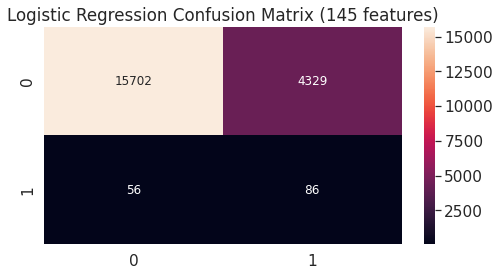

In [612]:
model_df_cm = pd.DataFrame(confusion_matrix, range(2), range(2)) 
plt.figure(figsize = (8, 4)) 
plt.title('Logistic Regression Confusion Matrix (145 features)')
sn.set(font_scale=1.4) #for label size 
sn.heatmap(model_df_cm, annot=True, annot_kws={"size": 12}, fmt="d").figure.savefig('./figs/logistic_cm_145_features.png', dpi=300)
plt.show()

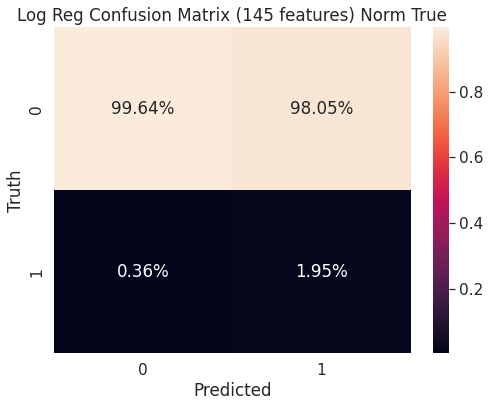

In [613]:
model_df_cm = pd.DataFrame(confusion_matrix, range(2), range(2)) 
plt.figure(figsize = (8, 6)) 
plt.title('Log Reg Confusion Matrix (145 features) Norm True')
sn.set(font_scale=1.4) #for label size 
sn.heatmap(model_df_cm/model_df_cm.astype(np.float).sum(axis=0), annot=True, fmt='.2%')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.savefig('./figs/log_reg_cm_145_features_norm.png', dpi=300)
# plt.show()

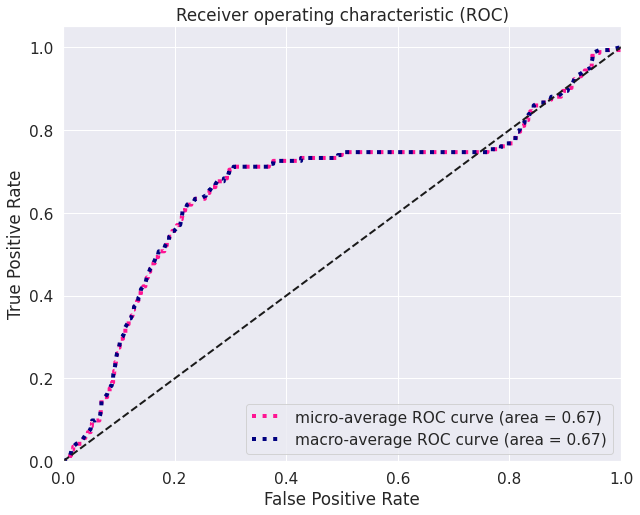

In [614]:
n_classes = 2

plt.figure(figsize = (10, 8)) 

# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred1)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred1.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
# plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes-97), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.savefig('./figs/log_reg_ROC_145_features.png', dpi=300)
# plt.show()

### Feature Importance Analysis

In [399]:
# fit model no training data
model = XGBClassifier(max_depth=2, learning_rate=0.01, n_estimators=300, eval_metric='error', n_jobs=-1)
model.fit(X_train, y_train)

# feature importance
print(model.feature_importances_)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.07016467 0.
 0.         0.         0.         0.         0.         0.
 0.40071002 0.         0.         0.         0.         0.
 0.08193857 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.00284538
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0. 

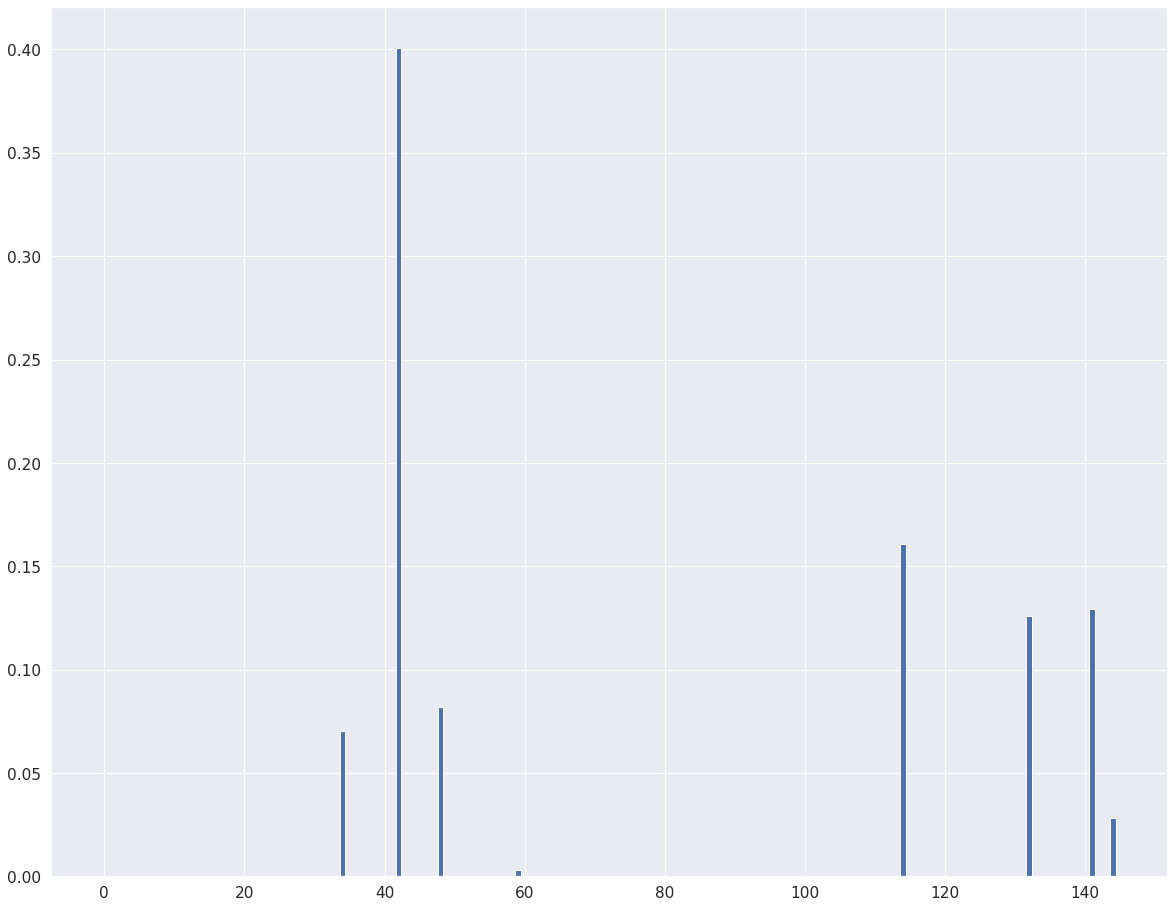

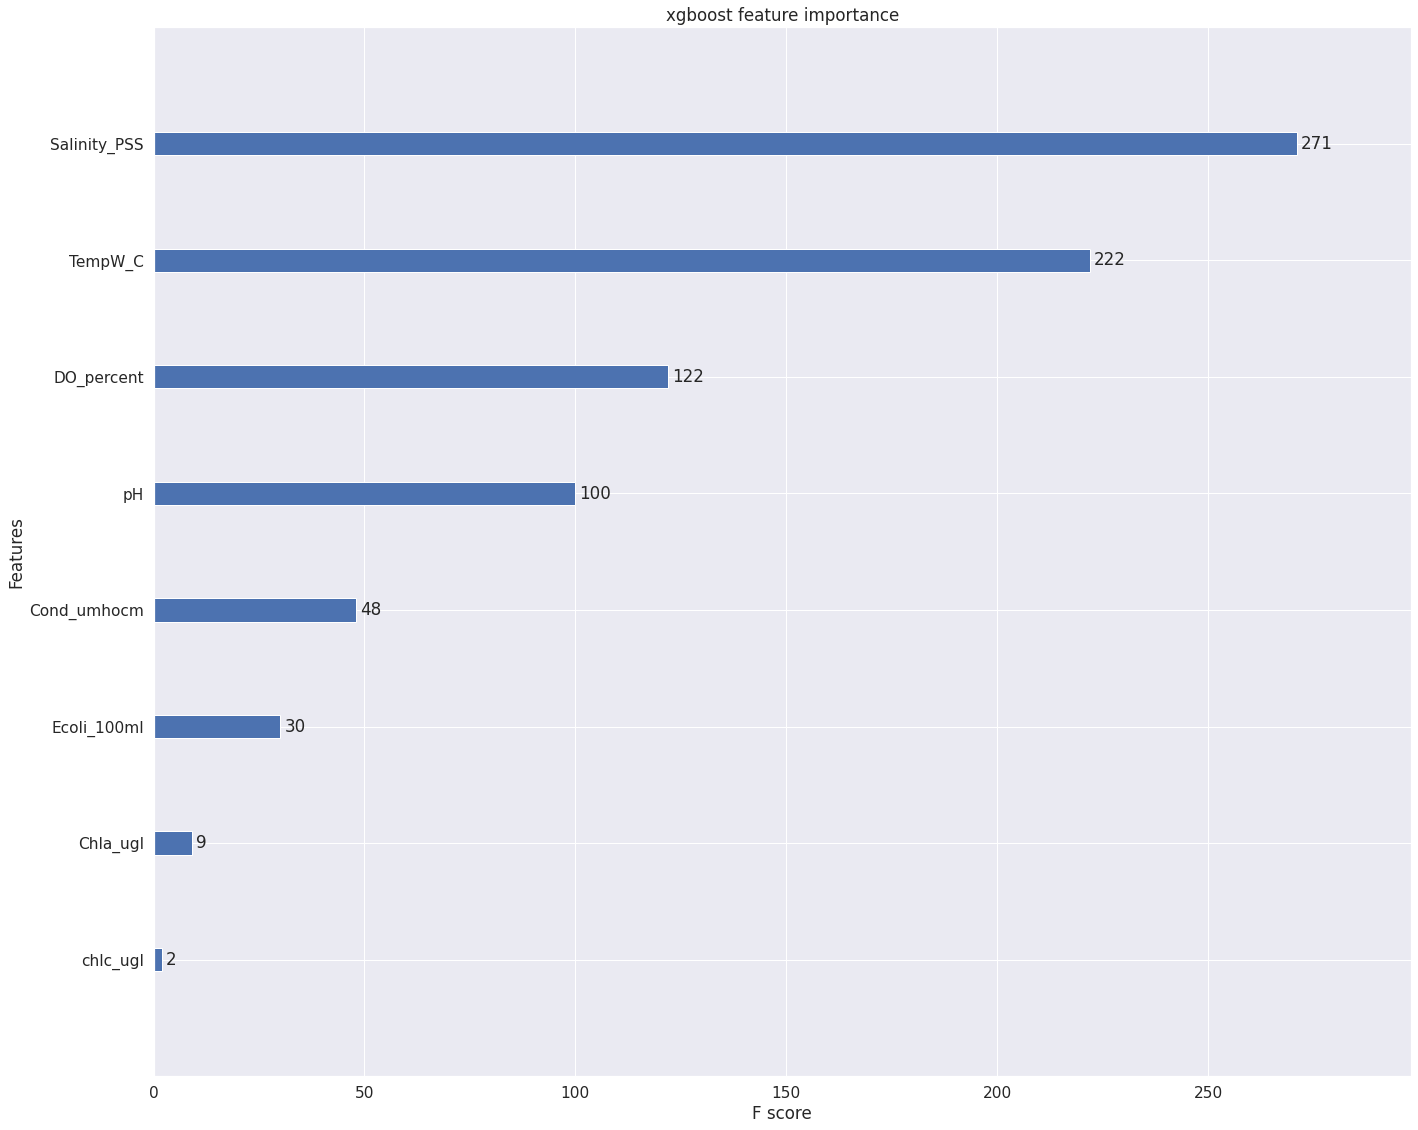

In [626]:
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
ax = plot_importance(model, title='xgboost feature importance')
ax.figure.tight_layout()
ax.figure.savefig('./figs/xgboost_feature_importance.png', dpi=100)
thresholds = sort(model.feature_importances_)
thresholds[::-1].sort()

In [401]:
# print(thresholds)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    dTrain = xgb.DMatrix(select_X_train, label=y_train)
    clf = XGBClassifier()

    clf_grid = GridSearchCV(estimator=clf, param_grid=xgb_param_grid, scoring=auc_predict_score, cv=3)
    clf_grid.fit(select_X_train, y_train)
    xgb_param = clf_grid.best_params_
    
    # xgb_param = clf.get_xgb_params()
    print(xgb_param)
    
    # selection_model.fit(select_X_train, y_train)
    select_X_test = selection.transform(X_test)
    pred = clf_grid.predict_proba(select_X_test)[:, 1]
    # pred = clf_grid.predict(select_X_test)
    
    predictions = [round(value) for value in pred]
    accuracy = accuracy_score(y_test, predictions)
    from sklearn.metrics import confusion_matrix
    
    confusion_matrix = confusion_matrix(y_test, predictions)
    print(confusion_matrix)
    specificity = confusion_matrix[0, 0] / (confusion_matrix[0, 0] + confusion_matrix[0, 1])
    sensitivity = confusion_matrix[1, 1] / (confusion_matrix[1, 0] + confusion_matrix[1, 1])
    print('Overall AUC:', roc_auc_score(y_test, predictions))
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%, specificity: %.2f%%, sensitivity: %.2f%%, fawadMetric: %.2f%%" % (
        thresh, select_X_train.shape[1], accuracy * 100.0, specificity * 100.0, sensitivity * 100.0,
        sensitivity * specificity * 100.0))
    print('\n')


{'eval_metric': 'error', 'gamma': 1, 'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 100, 'n_jobs': -1, 'random_state': 80, 'scale_pos_weight': 144.757225433526}
[[12020  8011]
 [    4   138]]
Overall AUC: 0.7859504387917039
Thresh=0.401, n=1, Accuracy: 60.27%, specificity: 60.01%, sensitivity: 97.18%, fawadMetric: 58.32%


{'eval_metric': 'error', 'gamma': 100.0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'n_jobs': -1, 'random_state': 80, 'scale_pos_weight': 144.757225433526}
[[14351  5680]
 [   23   119]]
Overall AUC: 0.7772338438800142
Thresh=0.161, n=2, Accuracy: 71.73%, specificity: 71.64%, sensitivity: 83.80%, fawadMetric: 60.04%


{'eval_metric': 'error', 'gamma': 100.0, 'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 100, 'n_jobs': -1, 'random_state': 80, 'scale_pos_weight': 144.757225433526}
[[14673  5358]
 [   29   113]]
Overall AUC: 0.7641446251268281
Thresh=0.129, n=3, Accuracy: 73.30%, specificity: 73.25%, sensitivity: 79.58%, fawadMetric: 58

### Building XGB Classifier on top features

In [469]:
# selected_features = [0, 47, 48, 114, 132, 141, 144]
selected_features = [34, 42, 48, 59, 114, 132, 141, 144]

In [470]:
X_train_selected_feat = X_train.iloc[:, selected_features[0:8]]
X_train_selected_feat = pd.DataFrame(X_train_selected_feat)

In [471]:
X_train_selected_feat.shape

(5043, 8)

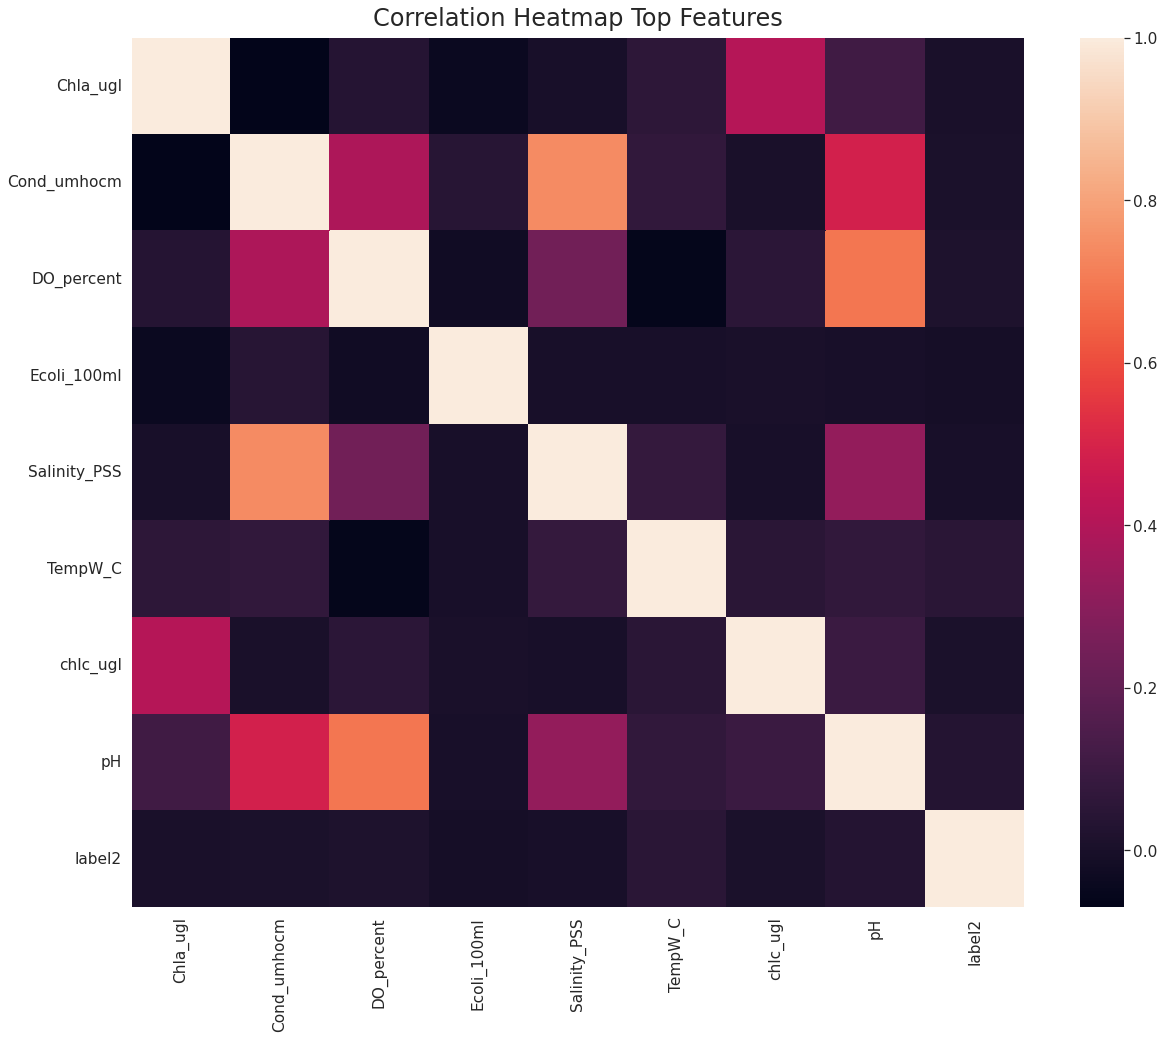

In [625]:
df_train_selected_feat = pd.concat([X_train_selected_feat, pd.DataFrame(y_train)], axis=1)
corr3 = df_train_selected_feat.corr()
# mask = np.triu(np.ones_like(input_data_pivot.corr(), dtype=bool))

# plotting the heatmap
plt.rcParams["figure.figsize"] = [20, 16]
heatmap = sns.heatmap(corr3)
heatmap.set_title('Correlation Heatmap Top Features', fontdict={'fontsize':24}, pad=12);
heatmap.figure.savefig('./figs/heatmap_label2_top_features', dpi=300)

In [504]:
corr3

,Chla_ugl,Cond_umhocm,DO_percent,Ecoli_100ml,Salinity_PSS,TempW_C,chlc_ugl,pH,label2
Chla_ugl,1.000000,-0.070584,0.035306,-0.040659,-0.000394,0.057932,0.409320,0.110053,0.004515
Cond_umhocm,-0.070584,1.000000,0.387383,0.041101,0.742852,0.069101,0.002725,0.489701,0.006215
DO_percent,0.035306,0.387383,1.000000,-0.021370,0.242434,-0.061028,0.051875,0.694021,0.015346
Ecoli_100ml,-0.040659,0.041101,-0.021370,1.000000,-0.000106,-0.001736,0.002337,-0.002861,-0.011316
Salinity_PSS,-0.000394,0.742852,0.242434,-0.000106,1.000000,0.078258,-0.000411,0.324518,-0.002769
TempW_C,0.057932,0.069101,-0.061028,-0.001736,0.078258,1.000000,0.047546,0.068771,0.049811
chlc_ugl,0.409320,0.002725,0.051875,0.002337,-0.000411,0.047546,1.000000,0.093774,0.007332
pH,0.110053,0.489701,0.694021,-0.002861,0.324518,0.068771,0.093774,1.000000,0.031722
label2,0.004515,0.006215,0.015346,-0.011316,-0.002769,0.049811,0.007332,0.031722,1.000000


In [505]:
corr3.reset_index()
for i, col in enumerate(corr3.columns):
    try:
        top = pd.DataFrame(corr3[(corr3[col]>0.5) | (corr3[col]<-0.5)][col].nlargest(8).to_frame()).reset_index()
        top = top.drop(top[top["index"]==col].index)
        if top.empty:
            pass
        else: 
            print(top)
            print("\n")
    except:
        pass

          index  Cond_umhocm
1  Salinity_PSS     0.742852


  index  DO_percent
1    pH    0.694021


         index  Salinity_PSS
1  Cond_umhocm      0.742852


        index        pH
1  DO_percent  0.694021




In [473]:
X_test_selected_feat = X_test.iloc[:, selected_features[0:8]]
X_test_selected_feat = pd.DataFrame(X_test_selected_feat)

In [474]:
# # train model
model4 = XGBClassifier()
CV_xgb2 = GridSearchCV(estimator=model4, param_grid=xgb_param_grid, scoring=auc_predict_score, cv=3, return_train_score=False)
CV_xgb2.fit(X_train_selected_feat, y_train)
CV_xgb2.cv_results_

{'mean_fit_time': array([0.22164575, 0.42447305, 0.62732164, 0.27431552, 0.52939073,
        0.81390111, 0.37190859, 0.57608334, 0.82487559, 0.19472901,
        0.4313453 , 0.62473178, 0.20760854, 0.33251174, 0.62945207,
        0.24537778, 0.58115387, 1.1075062 , 0.18012142, 0.37869501,
        0.62967674, 0.26443275, 0.51697874, 0.78586054, 0.36725012,
        0.45713536, 0.60143073, 0.10883967, 0.21295166, 0.31656416,
        0.1393195 , 0.27408735, 0.40856194, 0.19924172, 0.39388363,
        0.58993355]),
 'std_fit_time': array([0.00201016, 0.00116544, 0.00265499, 0.00168765, 0.00612524,
        0.00429521, 0.00309451, 0.06691422, 0.08407563, 0.0313652 ,
        0.00324785, 0.01065832, 0.04732044, 0.00895213, 0.10908274,
        0.01053823, 0.08480815, 0.0091431 , 0.03470347, 0.03768746,
        0.01121849, 0.01224723, 0.0185334 , 0.02014901, 0.01358413,
        0.04740973, 0.01292056, 0.00117325, 0.00217036, 0.00356638,
        0.00209114, 0.00489971, 0.00646362, 0.00337244, 0.007

In [475]:
print(CV_xgb2.best_params_)

{'eval_metric': 'error', 'gamma': 1, 'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 300, 'n_jobs': -1, 'random_state': 80, 'scale_pos_weight': 144.757225433526}


In [476]:
# # eval model
# y_pred1 = cross_val_predict(CV_xgb, X_test, y_test, cv=3, method='predict_proba')[:, 1]
y_pred1 = CV_xgb2.predict_proba(X_test_selected_feat)[:, 1]
print('Overall AUC:', roc_auc_score(y_test, y_pred1))
accuracy = accuracy_score(y_test, y_pred1.round(), normalize=True)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

confusion_matrix = confusion_matrix(y_test, y_pred1.round())
print(confusion_matrix)
print(classification_report(y_test, y_pred1.round()))
specificity = confusion_matrix[0, 0] / (confusion_matrix[0, 0] + confusion_matrix[0, 1])
sensitivity = confusion_matrix[1, 1] / (confusion_matrix[1, 0] + confusion_matrix[1, 1])
print("n=%d, Accuracy: %.2f%%, specificity: %.2f%%, sensitivity: %.2f%%" % (
    X_test_selected_feat.shape[1], accuracy * 100.0, specificity * 100.0, sensitivity * 100.0))

Overall AUC: 0.8879511405209248
[[17557  2474]
 [   44    98]]
              precision    recall  f1-score   support

           0       1.00      0.88      0.93     20031
           1       0.04      0.69      0.07       142

    accuracy                           0.88     20173
   macro avg       0.52      0.78      0.50     20173
weighted avg       0.99      0.88      0.93     20173

n=8, Accuracy: 87.52%, specificity: 87.65%, sensitivity: 69.01%


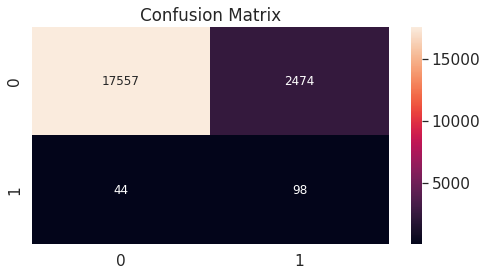

In [477]:
model_df_cm = pd.DataFrame(confusion_matrix, range(2), range(2)) 
plt.figure(figsize = (8, 4)) 
plt.title('Confusion Matrix')
sn.set(font_scale=1.4) #for label size 
sn.heatmap(model_df_cm, annot=True, annot_kws={"size": 12}, fmt="d") # font size 
plt.show()

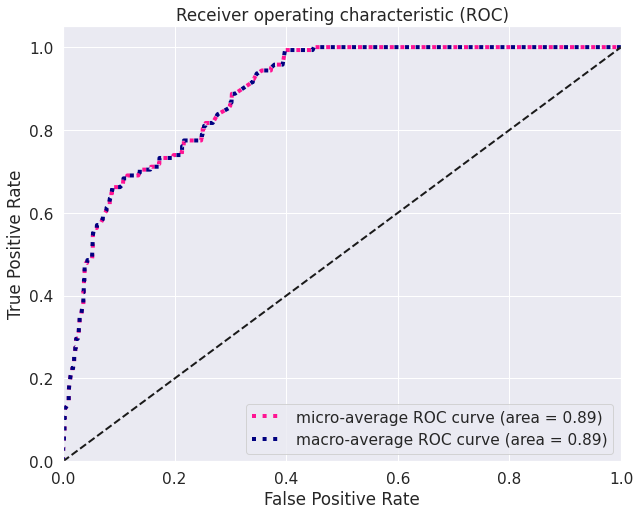

In [478]:
n_classes = 2

plt.figure(figsize = (10, 8)) 

# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred1)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test, y_pred1)
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
# plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes-97), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [479]:
from IPython.core.display import display, HTML

from aix360.algorithms.contrastive import CEMExplainer, KerasClassifier
from aix360.algorithms.protodash import ProtodashExplainer

In [480]:
df_selected_features = pd.concat([X_test_selected_feat, y_test], axis=1)

In [481]:
df_selected_features

,Chla_ugl,Cond_umhocm,DO_percent,Ecoli_100ml,Salinity_PSS,TempW_C,chlc_ugl,pH,label2
10166,13.186,800.000000,20.900000,841.73822,0.39000,21.570000,1.311167,7.340000,0
3027,4.700,28231.614564,84.617505,841.73822,18.98539,25.570452,1.311167,7.892637,0
3503,13.186,28231.614564,84.617505,841.73822,18.98539,25.570452,1.311167,8.650000,0
5343,13.186,28231.614564,84.617505,841.73822,18.98539,25.570452,1.311167,7.892637,0
22631,13.186,49691.000000,82.600000,841.73822,32.38000,29.800000,1.311167,8.290000,1
...,...,...,...,...,...,...,...,...,...
13304,13.186,28231.614564,84.617505,841.73822,18.98539,25.570452,1.311167,7.892637,0
19692,13.186,34750.000000,63.000000,841.73822,18.98539,32.980000,1.311167,7.940000,0
17888,13.186,38139.000000,94.700000,841.73822,24.04000,31.800000,1.311167,7.850000,0
1806,13.186,28231.614564,84.617505,841.73822,18.98539,25.570452,1.311167,7.892637,0


In [482]:
print("Size of water dataset:", df_selected_features.shape)
print("Number of \"No Algae\" applicants:", np.sum(df_selected_features['label2']==0))
print("Number of \"Algae\" applicants:", np.sum(df_selected_features['label2']==1))
print("Sample water bodies:")
df_selected_features.head(10).transpose()

Size of water dataset: (20173, 9)
Number of "No Algae" applicants: 20031
Number of "Algae" applicants: 142
Sample water bodies:


,10166,3027,3503,5343,22631,1684,23237,9542,18430,12025
Chla_ugl,13.186000,4.700000,13.186000,13.186000,13.186000,13.186000,13.186000,13.186000,13.186000,13.186000
Cond_umhocm,800.000000,28231.614564,28231.614564,28231.614564,49691.000000,31818.700000,44965.000000,28231.614564,49900.000000,28231.614564
DO_percent,20.900000,84.617505,84.617505,84.617505,82.600000,78.900000,115.500000,84.617505,67.700000,84.617505
Ecoli_100ml,841.738220,841.738220,841.738220,841.738220,841.738220,841.738220,841.738220,841.738220,841.738220,841.738220
Salinity_PSS,0.390000,18.985390,18.985390,18.985390,32.380000,19.780000,29.650000,18.985390,18.985390,18.985390
TempW_C,21.570000,25.570452,25.570452,25.570452,29.800000,27.055600,32.770000,25.570452,31.340000,25.570452
chlc_ugl,1.311167,1.311167,1.311167,1.311167,1.311167,1.311167,1.311167,1.311167,1.311167,1.311167
pH,7.340000,7.892637,8.650000,7.892637,8.290000,7.910000,8.300000,7.892637,8.080000,7.892637
label2,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Distribution of Salinity_PSS and pH columns:


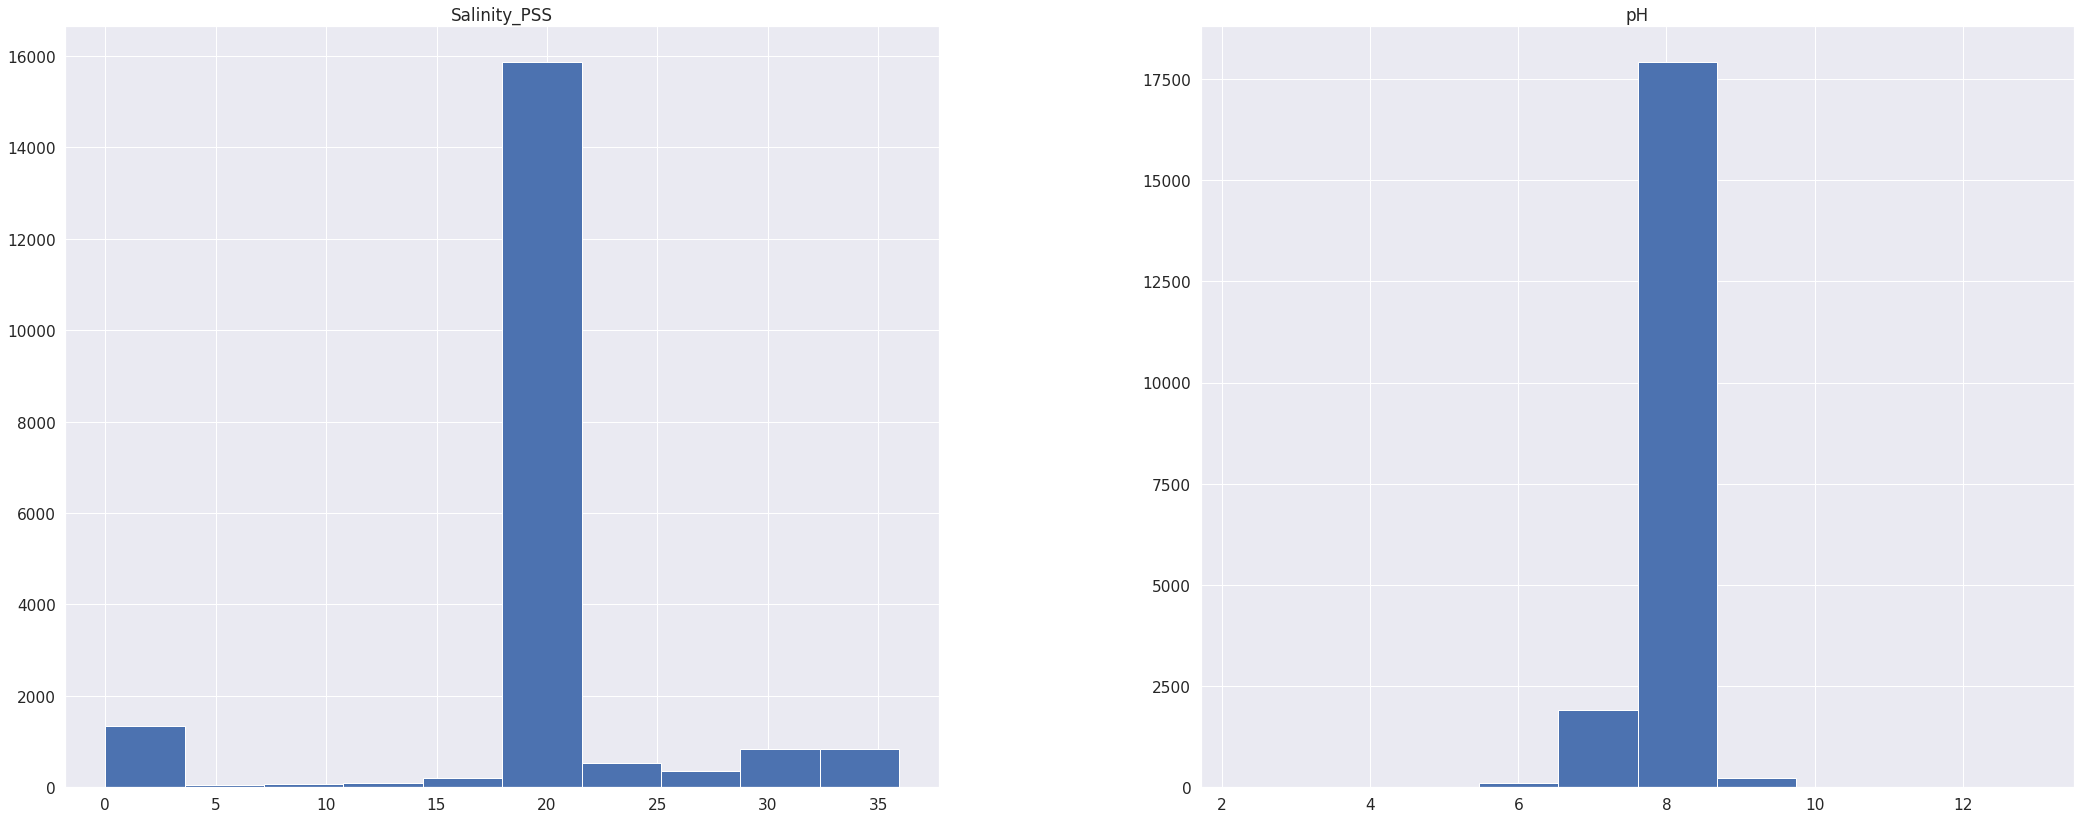

In [483]:
# Plot (example) distributions for two features
print("Distribution of Salinity_PSS and pH columns:")
hist = df_selected_features.hist(column=['Salinity_PSS', 'pH'], bins=10)

In [484]:
p_train = CV_xgb2.predict(X_train_selected_feat) # Use trained neural network to predict train points
p_train = p_train.reshape((p_train.shape[0],1))

z_train = np.hstack((X_train_selected_feat, p_train)) # Store (normalized) instances that were predicted as Good
z_train_no_algal = z_train[z_train[:,-1]==0, :]

In [485]:
class_names = [0, 1]

In [486]:
idx = 13304

X = X_test_selected_feat.iloc[[idx]]

print("Chosen Sample:", idx)
print("Prediction made by the model:", class_names[np.argmax(CV_xgb2.predict_proba(X))])
print("Prediction probabilities:", CV_xgb2.predict_proba(X))
print("")

# attach the prediction made by the model to X
X = np.hstack((X, CV_xgb2.predict(X).reshape((1,1))))

Xun = X_test_selected_feat.iloc[[idx]]
dfx = pd.DataFrame.from_records(Xun.astype('double')) # Create dataframe with original feature values
dfx[23] = class_names[int(X[0, -1])]
dfx.columns = df_selected_features.columns
dfx.transpose()

Chosen Sample: 13304
Prediction made by the model: 1
Prediction probabilities: [[0.4103108 0.5896892]]



,0
Chla_ugl,13.186000
Cond_umhocm,692.800000
DO_percent,92.200000
Ecoli_100ml,841.738220
Salinity_PSS,0.330000
TempW_C,29.200000
chlc_ugl,1.311167
pH,7.060000
label2,1.000000


In [487]:
explainer = ProtodashExplainer()
(W, S, setValues) = explainer.explain(X, z_train_no_algal, m=5) # Return weights W, Prototypes S and objective function values

In [488]:
dfs = pd.DataFrame.from_records(z_train_no_algal[S, 0:-1].astype('double'))
RP=[]
for i in range(S.shape[0]):
    RP.append(class_names[int(z_train_no_algal[S[i], -1])]) # Append class names
dfs[23] = RP
dfs.columns = df_selected_features.columns  
dfs["Weight"] = np.around(W, 5)/np.sum(np.around(W, 5)) # Calculate normalized importance weights
dfs.transpose()

,0,1,2,3,4
Chla_ugl,3.400000,18.100000,13.186000,13.186000,104.00000
Cond_umhocm,537.000000,11070.000000,55047.000000,47750.000000,502.00000
DO_percent,69.500000,51.500000,55.000000,243.000000,141.10000
Ecoli_100ml,651.000000,17300.000000,841.738220,841.738220,60.00000
Salinity_PSS,18.985390,18.985390,36.320000,18.985390,18.98539
TempW_C,30.650000,31.440000,30.230000,25.300000,25.26000
chlc_ugl,0.500000,1.900000,1.311167,1.311167,3.20000
pH,7.550000,7.260000,8.290000,8.470000,9.09000
label2,0.000000,0.000000,0.000000,0.000000,0.00000
Weight,0.907073,0.010877,0.000000,0.000000,0.08205


In [489]:
z = z_train_no_algal[S, 0:-1] # Store chosen prototypes
eps = 1e-10 # Small constant defined to eliminate divide-by-zero errors
fwt = np.zeros(z.shape)
for i in range (z.shape[0]):
    for j in range(z.shape[1]):
        fwt[i, j] = np.exp(-1 * abs(X[0, j] - z[i,j])/(np.std(z[:, j])+eps)) # Compute feature similarity in [0,1]
                
# move wts to a dataframe to display
dfw = pd.DataFrame.from_records(np.around(fwt.astype('double'), 2))
dfw.columns = df_selected_features.columns[:-1]
dfw.transpose()  

,0,1,2,3,4
Chla_ugl,0.77,0.88,1.00,1.00,0.09
Cond_umhocm,0.99,0.64,0.10,0.14,0.99
DO_percent,0.73,0.57,0.60,0.13,0.51
Ecoli_100ml,0.97,0.09,1.00,1.00,0.89
Salinity_PSS,0.07,0.07,0.01,0.07,0.07
TempW_C,0.59,0.44,0.68,0.24,0.23
chlc_ugl,0.40,0.52,1.00,1.00,0.12
pH,0.47,0.74,0.15,0.12,0.05


In [490]:
p_train = CV_xgb2.predict(X_train_selected_feat) # Use trained neural network to predict train points
p_train = p_train.reshape((p_train.shape[0],1))

z_train = np.hstack((X_train_selected_feat, p_train)) # Store (normalized) instances that were predicted as Good
z_train_algal = z_train[z_train[:,-1]==1, :]

In [491]:
class_names = [0, 1]

In [492]:
idx = 8909

X = X_test_selected_feat.iloc[[idx]]

print("Chosen Sample:", idx)
print("Prediction made by the model:", class_names[np.argmax(CV_xgb2.predict_proba(X))])
print("Prediction probabilities:", CV_xgb2.predict_proba(X))
print("")

# attach the prediction made by the model to X
X = np.hstack((X, CV_xgb2.predict(X).reshape((1,1))))

Xun = X_test_selected_feat.iloc[[idx]]
dfx = pd.DataFrame.from_records(Xun.astype('double')) # Create dataframe with original feature values
dfx[23] = class_names[int(X[0, -1])]
dfx.columns = df_selected_features.columns
dfx.transpose()

Chosen Sample: 8909
Prediction made by the model: 0
Prediction probabilities: [[0.75478125 0.24521875]]



,0
Chla_ugl,1.90000
Cond_umhocm,828.40000
DO_percent,42.50000
Ecoli_100ml,626.00000
Salinity_PSS,18.98539
TempW_C,24.35000
chlc_ugl,0.50000
pH,7.25000
label2,0.00000


In [493]:
explainer = ProtodashExplainer()
(W, S, setValues) = explainer.explain(X, z_train_algal, m=5) # Return weights W, Prototypes S and objective function values

In [494]:
dfs = pd.DataFrame.from_records(z_train_algal[S, 0:-1].astype('double'))
RP=[]
for i in range(S.shape[0]):
    RP.append(class_names[int(z_train_algal[S[i], -1])]) # Append class names
dfs[23] = RP
dfs.columns = df_selected_features.columns  
dfs["Weight"] = np.around(W, 5)/np.sum(np.around(W, 5)) # Calculate normalized importance weights
dfs.transpose()

,0,1,2,3,4
Chla_ugl,13.186000,13.186000,13.186000,13.186000,13.186000
Cond_umhocm,1127.000000,326.300000,54722.000000,51771.000000,1084.000000
DO_percent,46.000000,109.700000,126.400000,36.100000,0.000000
Ecoli_100ml,841.738220,841.738220,841.738220,841.738220,841.738220
Salinity_PSS,0.560000,18.985390,18.985390,34.040000,0.530000
TempW_C,25.610000,29.290000,29.220000,30.620000,28.910000
chlc_ugl,1.311167,1.311167,1.311167,1.311167,1.311167
pH,7.050000,7.892637,8.050000,8.370000,7.210000
label2,1.000000,1.000000,1.000000,1.000000,1.000000
Weight,0.000081,0.541375,0.000000,0.008673,0.449871


In [495]:
z = z_train_algal[S, 0:-1] # Store chosen prototypes
eps = 1e-10 # Small constant defined to eliminate divide-by-zero errors
fwt = np.zeros(z.shape)
for i in range (z.shape[0]):
    for j in range(z.shape[1]):
        fwt[i, j] = np.exp(-1 * abs(X[0, j] - z[i,j])/(np.std(z[:, j])+eps)) # Compute feature similarity in [0,1]
                
# move wts to a dataframe to display
dfw = pd.DataFrame.from_records(np.around(fwt.astype('double'), 2))
dfw.columns = df_selected_features.columns[:-1]
dfw.transpose()  

,0,1,2,3,4
Chla_ugl,0.00,0.00,0.00,0.00,0.00
Cond_umhocm,0.99,0.98,0.12,0.14,0.99
DO_percent,0.93,0.24,0.17,0.87,0.41
Ecoli_100ml,0.00,0.00,0.00,0.00,0.00
Salinity_PSS,0.24,1.00,1.00,0.31,0.23
TempW_C,0.47,0.05,0.05,0.02,0.06
chlc_ugl,0.00,0.00,0.00,0.00,0.00
pH,0.67,0.28,0.20,0.11,0.92


In [496]:
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 24)
pd.set_option('display.width', 1000)
print("Size of HELOC dataset:", df_selected_features.shape)
print("Number of \"Good\" applicants:", np.sum(df_selected_features['label2']==0))
print("Number of \"Bad\" applicants:", np.sum(df_selected_features['label2']==1))
print("Sample Applicants:")
df_selected_features.head(10).transpose()

Size of HELOC dataset: (20173, 9)
Number of "Good" applicants: 20031
Number of "Bad" applicants: 142
Sample Applicants:


,10166,3027,3503,5343,22631,1684,23237,9542,18430,12025
Chla_ugl,13.186000,4.700000,13.186000,13.186000,13.186000,13.186000,13.186000,13.186000,13.186000,13.186000
Cond_umhocm,800.000000,28231.614564,28231.614564,28231.614564,49691.000000,31818.700000,44965.000000,28231.614564,49900.000000,28231.614564
DO_percent,20.900000,84.617505,84.617505,84.617505,82.600000,78.900000,115.500000,84.617505,67.700000,84.617505
Ecoli_100ml,841.738220,841.738220,841.738220,841.738220,841.738220,841.738220,841.738220,841.738220,841.738220,841.738220
Salinity_PSS,0.390000,18.985390,18.985390,18.985390,32.380000,19.780000,29.650000,18.985390,18.985390,18.985390
TempW_C,21.570000,25.570452,25.570452,25.570452,29.800000,27.055600,32.770000,25.570452,31.340000,25.570452
chlc_ugl,1.311167,1.311167,1.311167,1.311167,1.311167,1.311167,1.311167,1.311167,1.311167,1.311167
pH,7.340000,7.892637,8.650000,7.892637,8.290000,7.910000,8.300000,7.892637,8.080000,7.892637
label2,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Distribution of pH and Salinity_PSS columns:


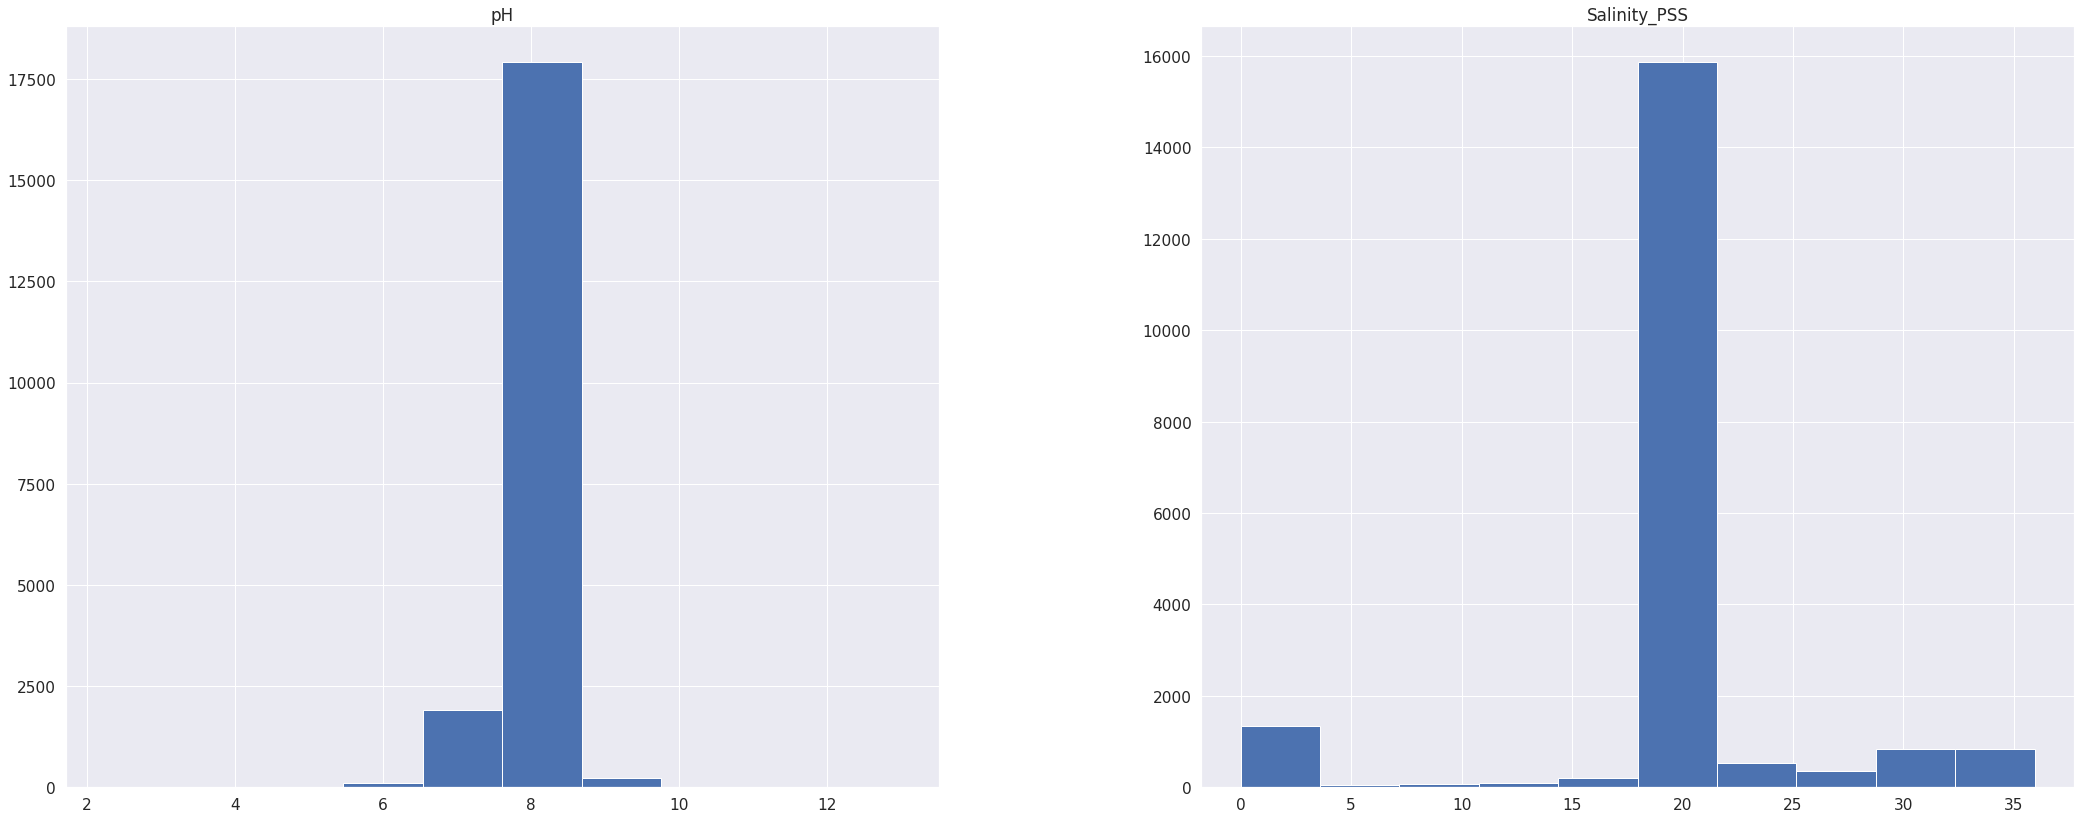

In [497]:
# Plot (example) distributions for two features
print("Distribution of pH and Salinity_PSS columns:")
hist = df_selected_features.hist(column=['pH', 'Salinity_PSS'], bins=10)